# Unravelling the Human Interaction with Generative AI-Based Decision Support in Healthcare

## Types of Chat Users When Having ChatGPT vs. a Human Expert as a Chat Partner

### CAS ADS Final Project by Mayra Spizzo

## Introduction

## Data Collection and Description


*   An experiment is conducted in which participants have to solve two patient cases (i.e., generate a diagnosis for a patient). Participants are split into two groups:
    * Group 1: chat with ChatGPT as a support to solve the patient case
    * Group 2: chat with a human expert (i.e., a physician) as a support to solve the case

*   Participation criteria:
    * Possible for all medical students at the Charité Medical School in Berlin that are in the fourth year of their studies (invited to participate: 640 students)
    * At least 18 years old
    * Have given their written consent for participation

*   The medical students are given two diagnostic tasks that are presented in random order. The patient cases in each of the two diagnostic tasks are based on real emergency cases.

*   Participants are randomly assigned to one condition (i.e., either to the human expert or ChatGPT). To solve the diagnostic task, they can chat with their assigned assistant in real time (i.e., a human coach or ChatGPT). During the task, all clicks, noted differential diagnoses, and chat interactions are logged with timestamps


In [2]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from IPython.display import Markdown, display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


## Descriptive Statistics

Based on the data collection process, the following data for each participant is collected:
*   Duration of the exchange with the expert (for both ChatGPT and human expert)
*   Number of chat interactions
*   Categorization of interaction (i.e., question types)
*   Discreteness of first question in the chat
*   Amount of included and excluded differential diagnoses
*   Patient case information acquisition by the participant



In [3]:
# Load data
url = "https://raw.githubusercontent.com/Mayra-N-S/CAS_ADS/main/Final%20Project/Assignment/data_emergency_medicine_study.csv"
df = pd.read_csv(url, sep=';') # Data frame for the k-means clustering
df1 = pd.read_csv(url, sep=';') # Data frame for the descriptive statistics
df2 = pd.read_csv(url, sep=';') # Data frame for the DBSCAN and HDBSCAN clustering

In [4]:
# Overview of variables in the data set
df1.info()

# Check for NA in variables
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          188 non-null    int64  
 1   Count                       188 non-null    int64  
 2   SessionId                   188 non-null    int64  
 3   Chat                        188 non-null    object 
 4   ParticipantId               188 non-null    object 
 5   Condition                   188 non-null    object 
 6   CaseTrue                    188 non-null    int64  
 7   Patienthistory              188 non-null    int64  
 8   Patientfindings             188 non-null    int64  
 9   Patientlab                  188 non-null    int64  
 10  Patientbildgebung           188 non-null    int64  
 11  Patientekg                  188 non-null    int64  
 12  Patientimage2               188 non-null    int64  
 13  AmountPatient               188 non

Id                              0
Count                           0
SessionId                       0
Chat                            0
ParticipantId                   0
Condition                       0
CaseTrue                        0
Patienthistory                  0
Patientfindings                 0
Patientlab                      0
Patientbildgebung               0
Patientekg                      0
Patientimage2                   0
AmountPatient                   0
AmountPatientRatio              0
Spalte2                        57
TimePatient                     0
TimePatientSeconds              0
TechnicalQuestion             106
Request                        72
Statement                     101
Differentiate                 156
Exclude                        59
SupportDiagnostics            182
SupportManagement             181
Other                          48
FirstQuestionCopy               4
FirstQuestionSelf               4
AmountDiagnosesMentioned       11
AmountDiagnosesExcluded       166
DurationInteraction             0
DurationInteractionSeconds      0
AmountInteraction               0
StartInteraction                0
EndInteraction                  0
dtype: int64

Note: The variables Patienthistory, Patientfindings, Patientlab, Patientbildgebung, Patientekg, and Patientimage represent the different provided information on the patient case. These variables were used to calculate the amount of patient information acquisition by the participant (i.e., the variable AmountPatientRatio).


Similarly the variables StartInteraction and EndInteraction indicate the time of start and the time of end of the chat interaction. These two variables were used to calculate the duration of the chat interaction, represented in variable DurationInteractionSeconds.

Variables for which *NA* can be ignored and the reason or it, respectively:


*   CalculateTimePatient: This variable was used to claculate the time variable for certain participants and is not used for the analysis of the data
*   FirstQuestionSelf: *NA* can remain, since they occur in chats, in which the participant did not interact in the chat, i.e. there was no first message by the participant (which can also be observed by the variable AmountInteraction). These data points will be excluded in the next steps

Variables for which *NAs* are set to *0* because *NA* indicate in these variables that there was no section coded for this variable in the chat data:



*   TechnicalQuestion
*   Request
*   Statement
*   Differentiate
*   Exclude
*   SupportDiagnostics
*   SupportManagement
*   Other
*   AmountDiagnosesMentioned
*   AmountDiagnosesExcluded















In [5]:
# Clean the data set
# Rename column "Spalte2"
df.rename(columns={'Spalte2': 'CalculationTimePatient'}, inplace=True)
df1.rename(columns={'Spalte2': 'CalculationTimePatient'}, inplace=True)
df2.rename(columns={'Spalte2': 'CalculationTimePatient'}, inplace=True)

# Delete column "Unnamed: 35"
#df = df.drop(columns=['Unnamed: 35'])
#df1 = df1.drop(columns=['Unnamed: 35'])
#df2 = df2.drop(columns=['Unnamed: 35'])

In [6]:
# Set NA in the mentioned columns above to 0
df['TechnicalQuestion'] = df['TechnicalQuestion'].fillna(0)
df['Request'] = df['Request'].fillna(0)
df['Statement'] = df['Statement'].fillna(0)
df['Differentiate'] = df['Differentiate'].fillna(0)
df['Exclude'] = df['Exclude'].fillna(0)
df['SupportDiagnostics'] = df['SupportDiagnostics'].fillna(0)
df['SupportManagement'] = df['SupportManagement'].fillna(0)
df['Other'] = df['Other'].fillna(0)
df['AmountDiagnosesMentioned'] = df['AmountDiagnosesMentioned'].fillna(0)
df['AmountDiagnosesExcluded'] = df['AmountDiagnosesExcluded'].fillna(0)

In [7]:
df1['TechnicalQuestion'] = df1['TechnicalQuestion'].fillna(0)
df1['Request'] = df1['Request'].fillna(0)
df1['Statement'] = df1['Statement'].fillna(0)
df1['Differentiate'] = df1['Differentiate'].fillna(0)
df1['Exclude'] = df1['Exclude'].fillna(0)
df1['SupportDiagnostics'] = df1['SupportDiagnostics'].fillna(0)
df1['SupportManagement'] = df1['SupportManagement'].fillna(0)
df1['Other'] = df1['Other'].fillna(0)
df1['AmountDiagnosesMentioned'] = df1['AmountDiagnosesMentioned'].fillna(0)
df1['AmountDiagnosesExcluded'] = df1['AmountDiagnosesExcluded'].fillna(0)

In [8]:
df2['TechnicalQuestion'] = df2['TechnicalQuestion'].fillna(0)
df2['Request'] = df2['Request'].fillna(0)
df2['Statement'] = df2['Statement'].fillna(0)
df2['Differentiate'] = df2['Differentiate'].fillna(0)
df2['Exclude'] = df2['Exclude'].fillna(0)
df2['SupportDiagnostics'] = df2['SupportDiagnostics'].fillna(0)
df2['SupportManagement'] = df2['SupportManagement'].fillna(0)
df2['Other'] = df2['Other'].fillna(0)
df2['AmountDiagnosesMentioned'] = df2['AmountDiagnosesMentioned'].fillna(0)
df2['AmountDiagnosesExcluded'] = df2['AmountDiagnosesExcluded'].fillna(0)

In [9]:
# Check if change of NA in variables worked
df.isna().sum()
df1.isna().sum()
df2.isna().sum()

Id                             0
Count                          0
SessionId                      0
Chat                           0
ParticipantId                  0
Condition                      0
CaseTrue                       0
Patienthistory                 0
Patientfindings                0
Patientlab                     0
Patientbildgebung              0
Patientekg                     0
Patientimage2                  0
AmountPatient                  0
AmountPatientRatio             0
CalculationTimePatient        57
TimePatient                    0
TimePatientSeconds             0
TechnicalQuestion              0
Request                        0
Statement                      0
Differentiate                  0
Exclude                        0
SupportDiagnostics             0
SupportManagement              0
Other                          0
FirstQuestionCopy              4
FirstQuestionSelf              4
AmountDiagnosesMentioned       0
AmountDiagnosesExcluded        0
DurationInteraction            0
DurationInteractionSeconds     0
AmountInteraction              0
StartInteraction               0
EndInteraction                 0
dtype: int64

In [10]:
# Exclude data points where participants did not interact with their assistant and therefore, where no chat data is available
# Delete data points with NA in the variable FirstQuestionSelf
df = df.dropna(subset=['FirstQuestionSelf'])
df1 = df1.dropna(subset=['FirstQuestionSelf'])
df2 = df2.dropna(subset=['FirstQuestionSelf'])

In [11]:
# Check if it worked
# Amount of data points in the data set
print(len(df))
print(len(df1))
print(len(df2))
# It worked, there are now 184 data points, 4 were excluded, previousely the data set comprised 188 data points

184
184
184


In [12]:
# Dataset overview
# Get variables
n_participants = df1['Count'].nunique()
human_interaction = df1['Condition'].value_counts()['Human']
gpt_interaction = df1['Condition'].value_counts()['GPT']
time_per_patient = df1['TimePatientSeconds'].mean()
time_per_patient_human = df1[df1['Condition'] == 'Human']['TimePatientSeconds'].mean()
time_per_patient_gpt = df1[df1['Condition'] == 'GPT']['TimePatientSeconds'].mean()
amount_interaction = df1['AmountInteraction'].mean()
amount_interaction_gpt = df1[df1['Condition'] == 'GPT']['AmountInteraction'].mean()
amount_interaction_human = df1[df1['Condition'] == 'Human']['AmountInteraction'].mean()
duration_interaction = df1['DurationInteractionSeconds'].mean()
duration_interaction_human = df1[df1['Condition'] == 'Human']['DurationInteractionSeconds'].mean()
duration_interaction_gpt = df1[df1['Condition'] == 'GPT']['DurationInteractionSeconds'].mean()
amount_patient_ratio = df1['AmountPatientRatio'].mean()


In [22]:
table_md = f"""

| Variable             | Observations|
|-------------------------|-------|
|Number of participants | {n_participants} |
|Human interactions | {human_interaction} |
|GPT interactions| {gpt_interaction} |
|Average time per patient (seconds)| {round(time_per_patient)} |
|Average time per patient - Human (seconds)| {round(time_per_patient_human)} |
|Average time per patient - GPT (seconds)| {round(time_per_patient_gpt)} |
|Average amount of interaction| {round(amount_interaction)} |
|Average amount of interaction - Human| {round(amount_interaction_human)} |
|Average amount of interaction - GPT | {round(amount_interaction_gpt)} |
|Average duration of interaction| {round(duration_interaction)} |
|Average duration of interaction - Human| {round(duration_interaction_human)} |
|Average duration of interaction - GPT | {round(duration_interaction_gpt)} |
|Patient information viewed by medical student | {round(amount_patient_ratio,2)} |

"""
# Display Table
display(Markdown(table_md))



| Variable             | Observations|
|-------------------------|-------|
|Number of participants | 184 |
|Human interactions | 93 |
|GPT interactions| 91 |
|Average time per patient (seconds)| 269 |
|Average time per patient - Human (seconds)| 279 |
|Average time per patient - GPT (seconds)| 259 |
|Average amount of interaction| 19 |
|Average amount of interaction - Human| 23 |
|Average amount of interaction - GPT | 14 |
|Average duration of interaction| 761 |
|Average duration of interaction - Human| 875 |
|Average duration of interaction - GPT | 645 |
|Patient information viewed by medical student | 0.85 |



### Plot for the Chat Interaction Variables

[Text(0, 0, 'Amount of chat messages')]

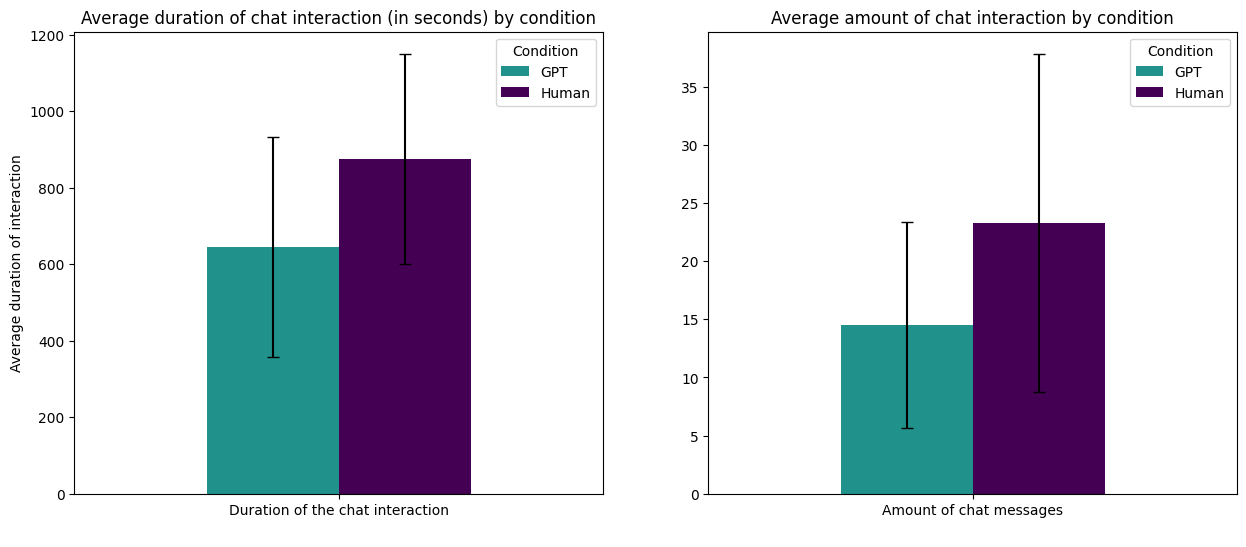

In [35]:
df = pd.DataFrame(df1)

# Selecting columns and computing the means and standard deviations
selected_columns_time = ['DurationInteractionSeconds', 'Condition']
selected_columns_interaction = ['AmountInteraction', 'Condition']

average_time = df[selected_columns_time]
average_interaction = df[selected_columns_interaction]

# Group by 'Condition' and calculate mean and standard deviation
grouped_average_time = average_time.groupby('Condition').mean()
grouped_std_time = average_time.groupby('Condition').std()  # Standard deviation for time

grouped_average_interaction = average_interaction.groupby('Condition').mean()
grouped_std_interaction = average_interaction.groupby('Condition').std()  # Standard deviation for interaction

# Transpose the data to have categories on x-axis
grouped_average_time = grouped_average_time.T
grouped_std_time = grouped_std_time.T  # Transpose standard deviation for time

grouped_average_interaction = grouped_average_interaction.T
grouped_std_interaction = grouped_std_interaction.T  # Transpose standard deviation for interaction

# Plotting side by side with error bars
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Average time of interactions with error bars
grouped_average_time.plot(kind='bar', yerr=grouped_std_time, ax=axes[0], capsize=4, legend=True, cmap=ListedColormap(['#21918c', '#440154']))
axes[0].set_title('Average duration of chat interaction (in seconds) by condition')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Average duration of interaction')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Condition')
axes[0].set_xticklabels(['Duration of the chat interaction'])

# Second plot: Average amount of interaction with error bars
grouped_average_interaction.plot(kind='bar', yerr=grouped_std_interaction, ax=axes[1], capsize=4, legend=True, cmap=ListedColormap(['#21918c', '#440154']))
axes[1].set_title('Average amount of chat interaction by condition')
axes[1].set_xlabel(' ')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xticklabels(['Amount of chat messages'])



### Plot for the Question Types

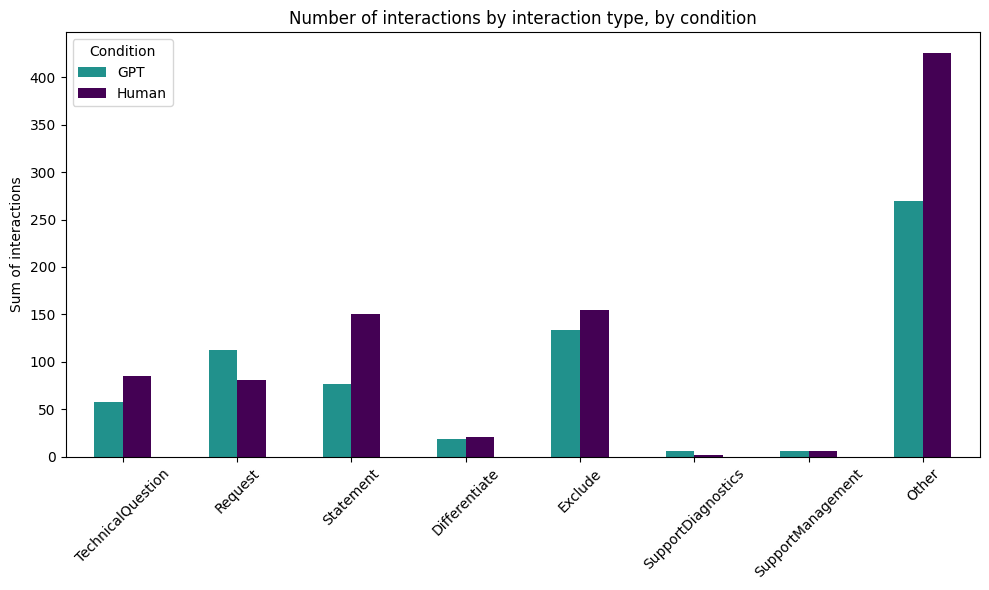

In [38]:
#df = pd.DataFrame(df2)
selected_columns = ['Condition','TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement','Other']

sum_replies = df[selected_columns]

grouped_sum = sum_replies.groupby('Condition').sum()

grouped_sum = grouped_sum.T  # Transpose, so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6), cmap=ListedColormap(['#21918c', '#440154']))

# Customize the plot
plt.title('Number of interactions by interaction type, by condition')
plt.xlabel('')
plt.ylabel('Sum of interactions')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()




In [18]:
# Numeric values corresponding to the plot
print("Number of interactions by interaction type, by condition:")
display(grouped_sum)

Number of interactions by interaction type, by condition:


Condition             GPT  Human
TechnicalQuestion    58.0   85.0
Request             112.0   81.0
Statement            77.0  150.0
Differentiate        19.0   21.0
Exclude             134.0  155.0
SupportDiagnostics    6.0    2.0
SupportManagement     6.0    6.0
Other               269.0  426.0

### Plot for the Amount of Diagnoses

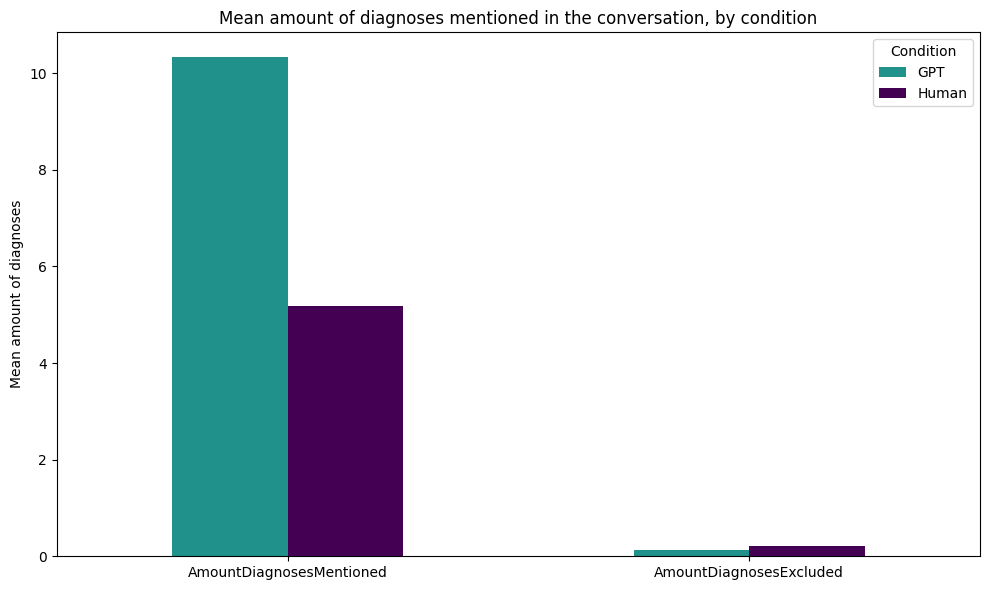

In [19]:
selected_columns = ['Condition','AmountDiagnosesMentioned', 'AmountDiagnosesExcluded']

sum_replies = df[selected_columns]
grouped_sum = sum_replies.groupby('Condition').mean()
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6), cmap=ListedColormap(['#21918c', '#440154']))

# Customize the plot
plt.title('Mean amount of diagnoses mentioned in the conversation, by condition')
plt.xlabel('')
plt.ylabel('Mean amount of diagnoses')
plt.xticks(rotation=0)
plt.legend(title='Condition')
plt.tight_layout()

plt.show()


In [20]:
# Numeric values corresponding to the plot
print("Number of interactions by interaction type, by condition:")
display(grouped_sum)

Number of interactions by interaction type, by condition:


Condition                       GPT     Human
AmountDiagnosesMentioned  10.329670  5.182796
AmountDiagnosesExcluded    0.131868  0.204301

### Pairwise Scatterplot

First, a pairwise scatterplot for the overall data is generated.

/tmp/ipython-input-27-2125201684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatterplot_data['Condition'] = scatterplot_data['Condition'].apply(lambda x: 1 if x == "GPT" else 0)


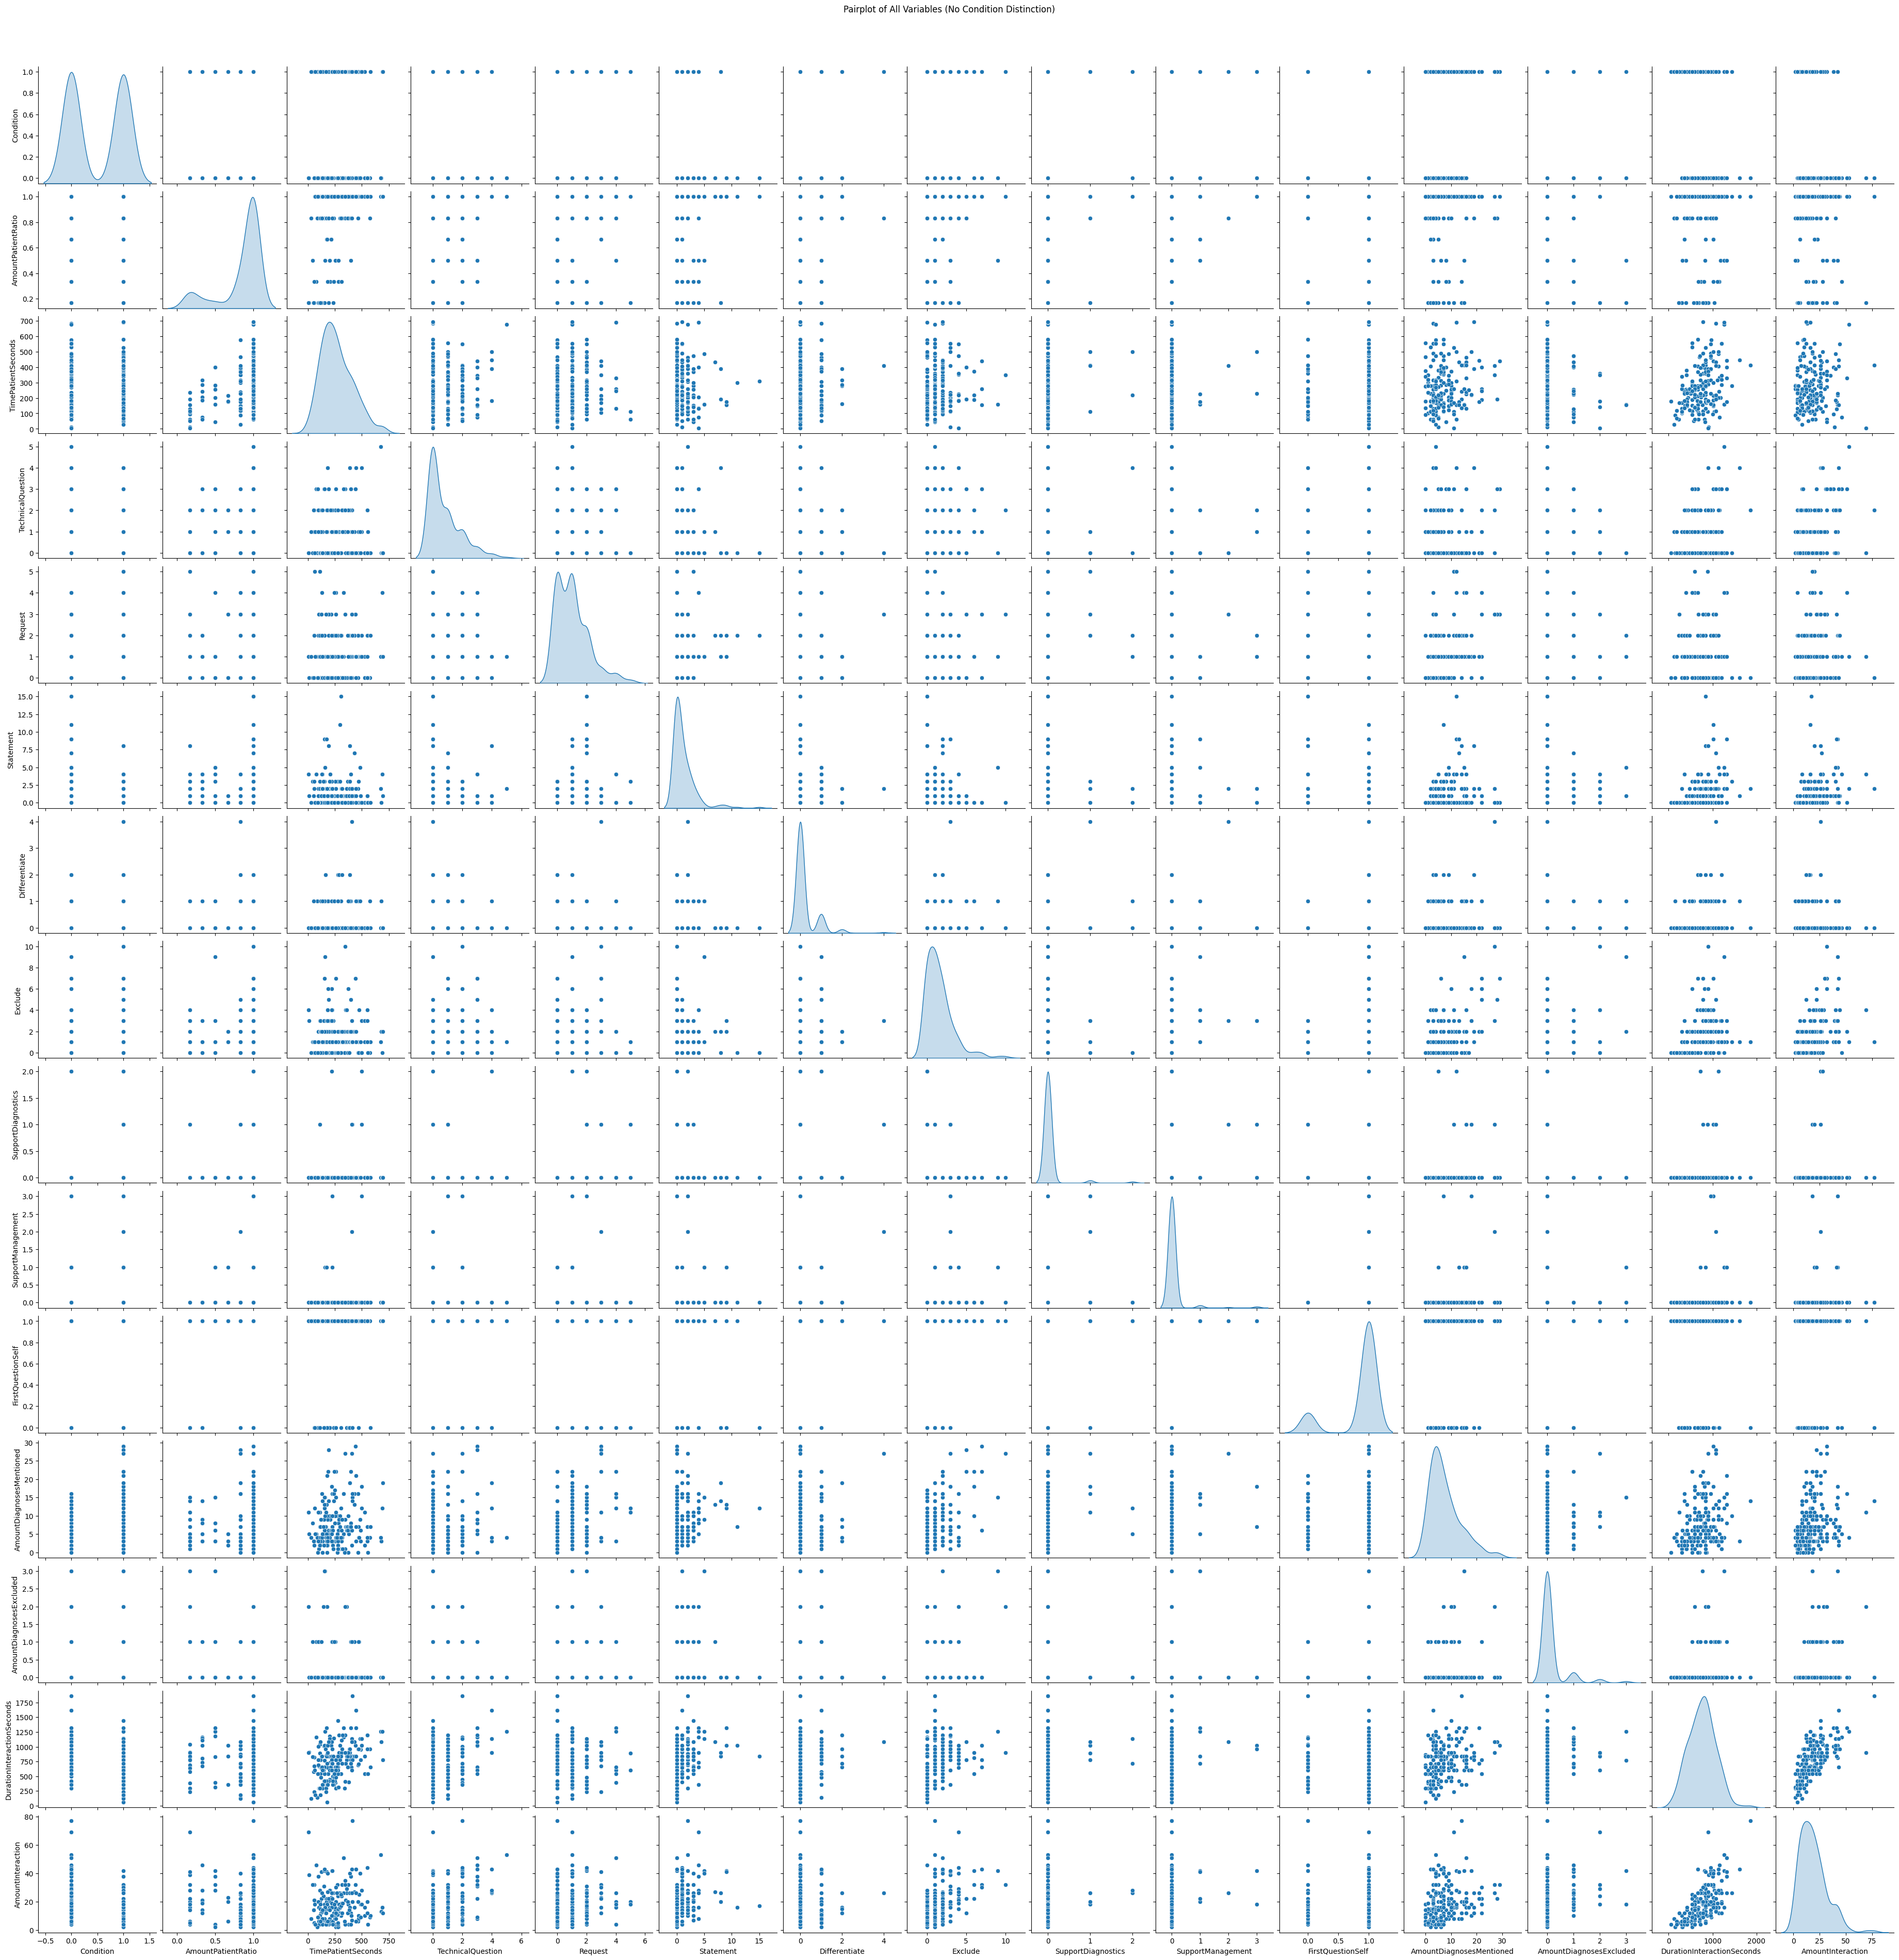

In [27]:
scatterplot_data = df1[['Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'AmountDiagnosesExcluded', 'DurationInteractionSeconds', 'AmountInteraction']]
scatterplot_data['Condition'] = scatterplot_data['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

# Generate a pairplot for all variables, without 'hue' argument
sns.pairplot(scatterplot_data, diag_kind='kde') # Removed hue='Condition'
plt.suptitle('Pairplot of All Variables (No Condition Distinction)', y=1.02)
plt.show()

# Diagnoal line:
# Univariate distributions for each variable
# The diagonal plots are Kernel Density Estimate (KDE) plots

Second, a pairwise scatterplot for the data  by condition is generated.

/tmp/ipython-input-28-2819170935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatterplot_data['Condition'] = scatterplot_data['Condition'].apply(lambda x: 1 if x == "GPT" else 0)


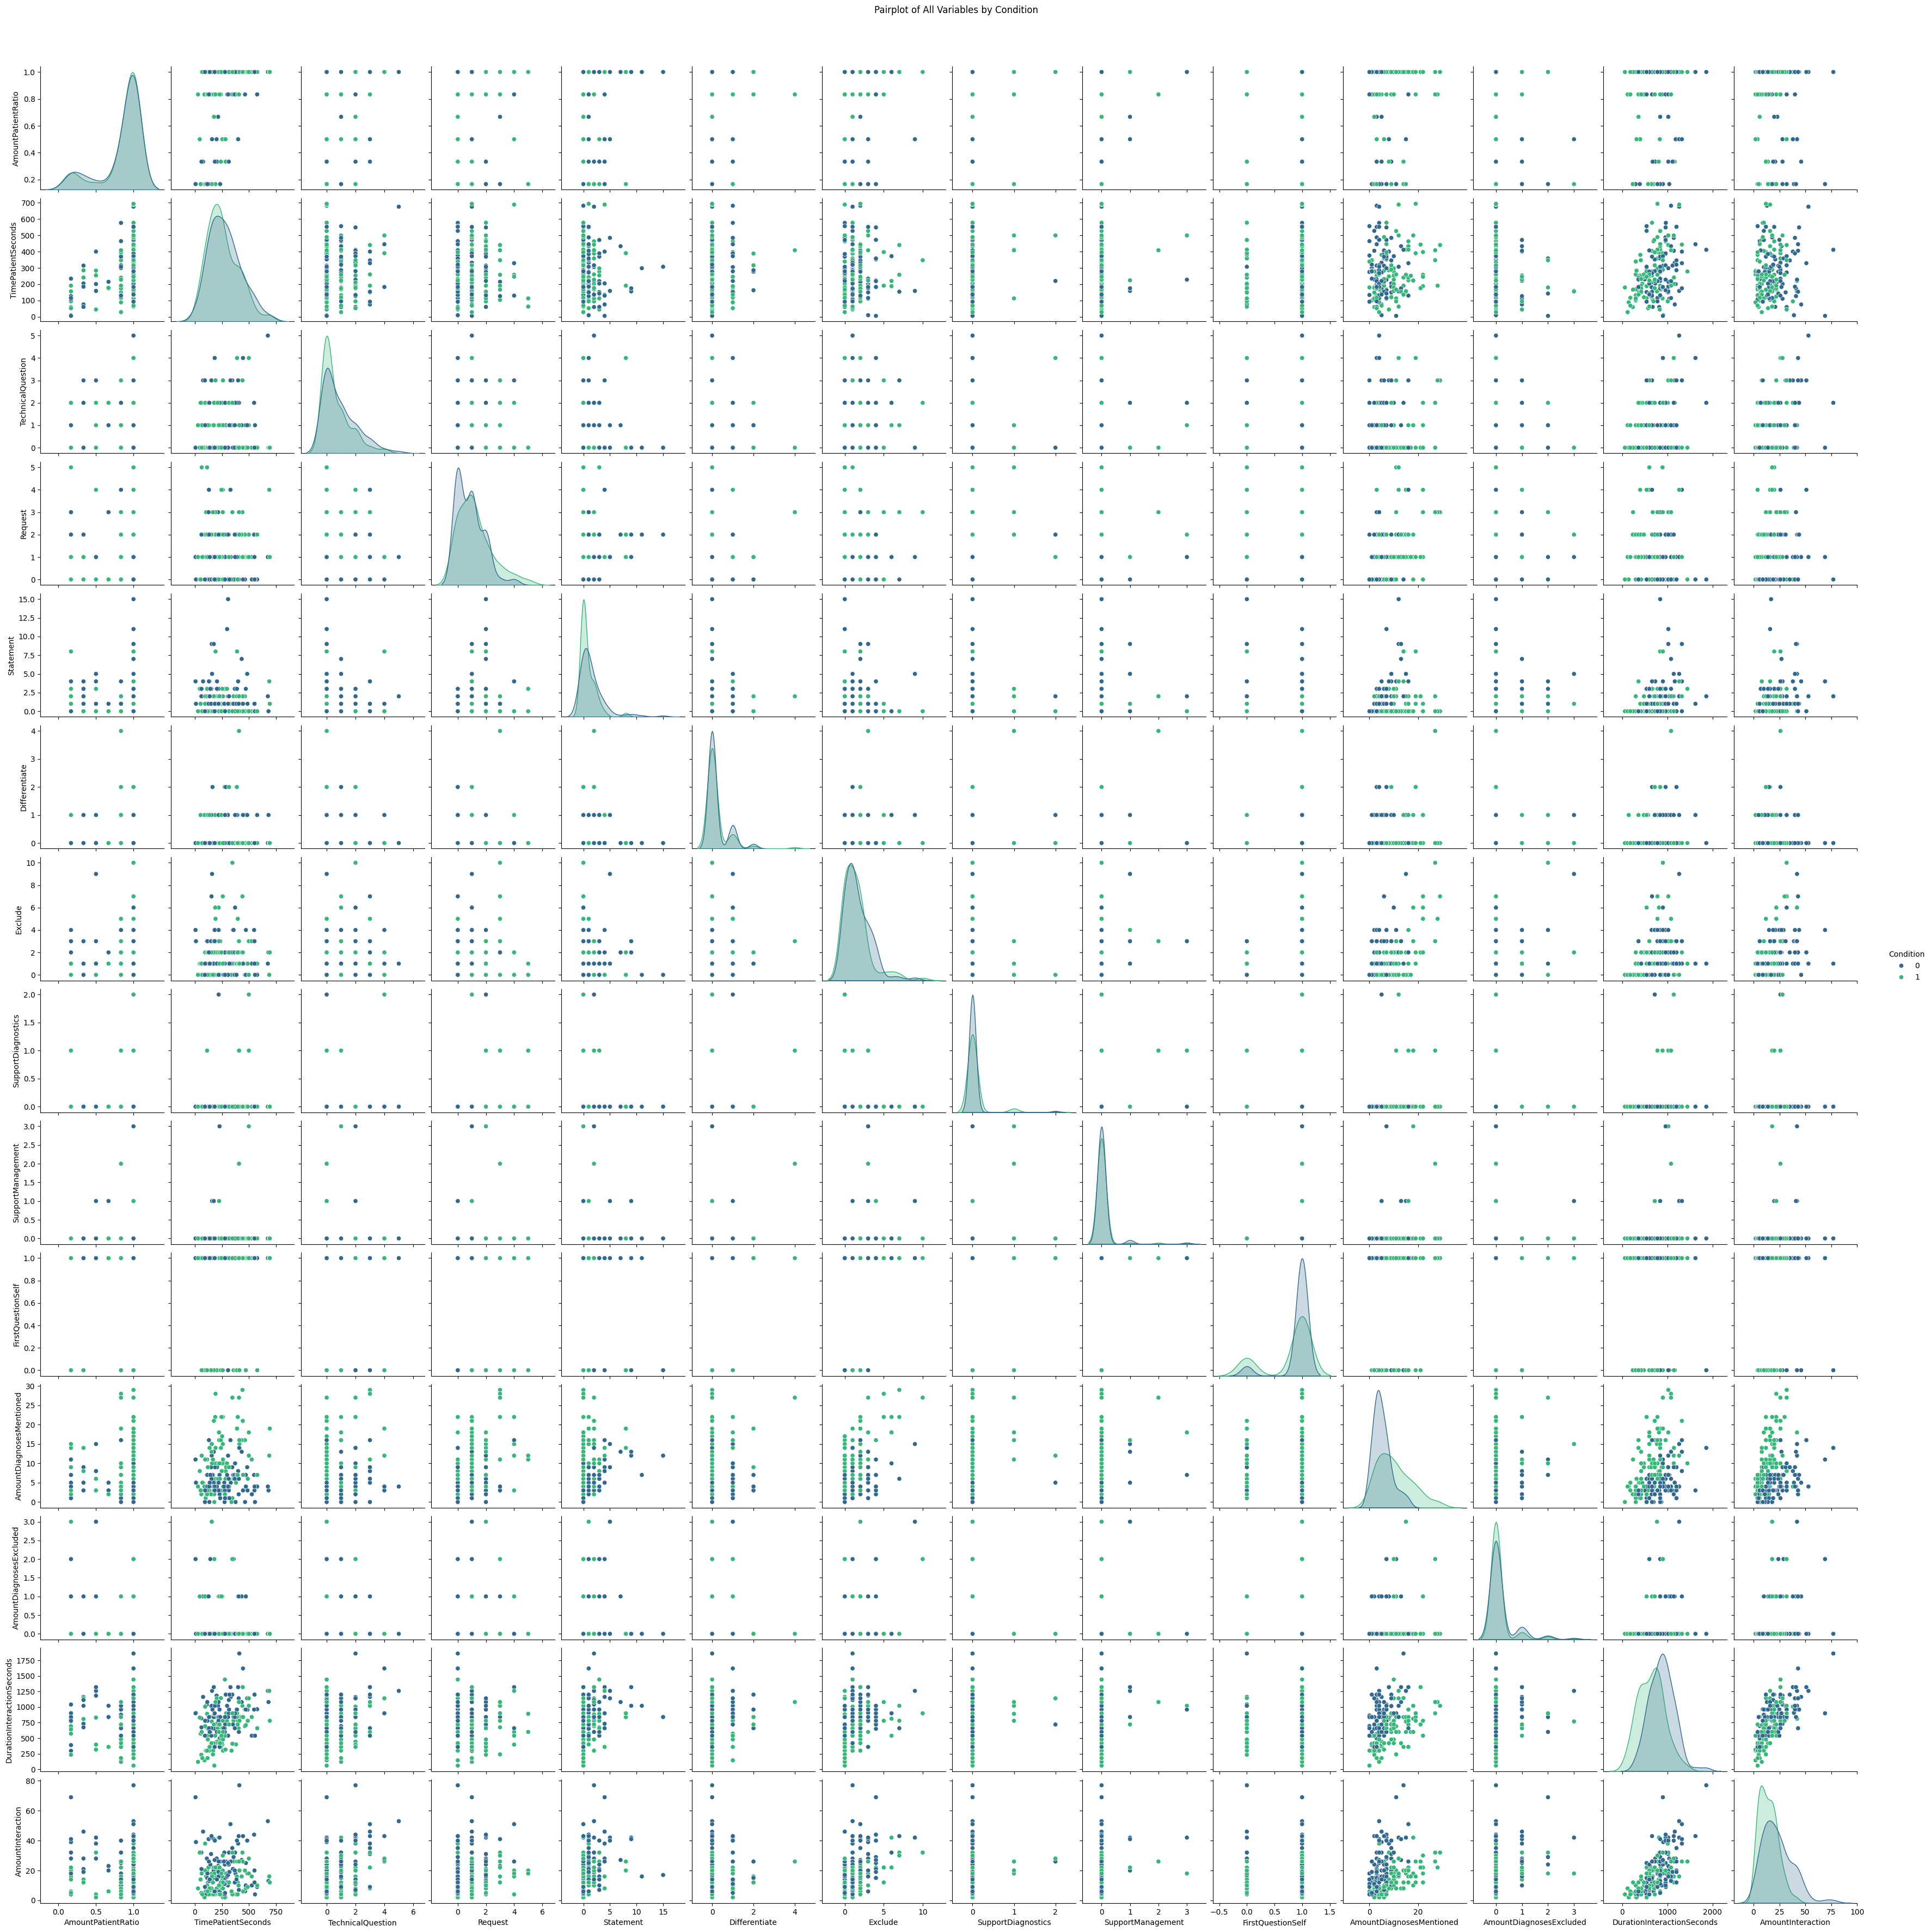

In [28]:
scatterplot_data = df1[['Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'AmountDiagnosesExcluded', 'DurationInteractionSeconds', 'AmountInteraction']]
scatterplot_data['Condition'] = scatterplot_data['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

# Generate a pairplot for all variables, colored by 'Condition'
sns.pairplot(scatterplot_data, hue='Condition', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of All Variables by Condition', y=1.02)
plt.savefig('all_scatterplots.png')

## Unsupervised Machine Learning Methods

### K-means

In [14]:
# Create a dataframe with the necessary variables
clustering_df = df[['Count', 'Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'AmountDiagnosesExcluded', 'DurationInteractionSeconds', 'AmountInteraction']]

# Create a binary column for the variable 'Condition'
# 1 = ChatGPT, 0 = Human expert
clustering_df['Condition'] = clustering_df['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

print(clustering_df)

     Count  Condition  AmountPatientRatio  TimePatientSeconds  \
0        1          1            1.000000                 202   
1        2          1            1.000000                 114   
2        3          1            0.166667                 191   
3        4          1            0.166667                 104   
4        5          0            0.166667                 111   
..     ...        ...                 ...                 ...   
183    185          1            0.833333                 408   
184    186          0            1.000000                 279   
185    187          0            1.000000                 183   
186    188          0            1.000000                  95   
187    189          0            1.000000                  93   

     TechnicalQuestion  Request  Statement  Differentiate  Exclude  \
0                  2.0      0.0        0.0            0.0      2.0   
1                  1.0      0.0        0.0            0.0      1.0   
2        

/tmp/ipython-input-14-1872641175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['Condition'] = clustering_df['Condition'].apply(lambda x: 1 if x == "GPT" else 0)


In [15]:
# Create two subsets for each condition
clustering_gpt = clustering_df[clustering_df['Condition'] == 1]
clustering_human = clustering_df[clustering_df['Condition'] == 0]

# Check if it worked
clustering_gpt.head()
clustering_human.head()

Count  Condition  AmountPatientRatio  TimePatientSeconds  \
4       5          0            0.166667                 111   
5       6          0            0.333333                 205   
6       7          0            0.500000                 201   
7       8          0            0.833333                 182   
10     11          0            0.833333                 464   

    TechnicalQuestion  Request  Statement  Differentiate  Exclude  \
4                 0.0      2.0        2.0            0.0      3.0   
5                 0.0      1.0        4.0            0.0      1.0   
6                 0.0      1.0        1.0            0.0      3.0   
7                 1.0      0.0        1.0            0.0      4.0   
10                1.0      0.0        0.0            0.0      0.0   

    SupportDiagnostics  SupportManagement  FirstQuestionSelf  \
4                  0.0                0.0                0.0   
5                  0.0                0.0                0.0   
6                  0.0                0.0                1.0   
7                  0.0                0.0                1.0   
10                 0.0                0.0                1.0   

    AmountDiagnosesMentioned  AmountDiagnosesExcluded  \
4                        7.0                      1.0   
5                        9.0                      0.0   
6                        3.0                      0.0   
7                        2.0                      0.0   
10                       0.0                      0.0   

    DurationInteractionSeconds  AmountInteraction  
4                         1041                 28  
5                          731                 28  
6                         1183                 28  
7                          651                 15  
10                         695                  6

In [16]:
# Check if there are missing values in the data frames
print(clustering_df.isna().sum())

print(clustering_gpt.isna().sum())
print(clustering_human.isna().sum())
# No, there are no missing values left

Count                         0
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
SupportDiagnostics            0
SupportManagement             0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
AmountDiagnosesExcluded       0
DurationInteractionSeconds    0
AmountInteraction             0
dtype: int64
Count                         0
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
SupportDiagnostics            0
SupportManagement             0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
AmountDiagnosesExcluded       0
DurationInteractionSeconds 

#### Dimensionality Reduction - PCA Version

Apply a PCA to reduce the dimensionality:

In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clustering_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
# Calculate explained variance ratio for PCA
# Assuming 'pca' object from the previous PCA step is available
if 'pca' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8275
Principal Component 2: 0.1477


Use of the elbow method to find the optimal number of clusters:

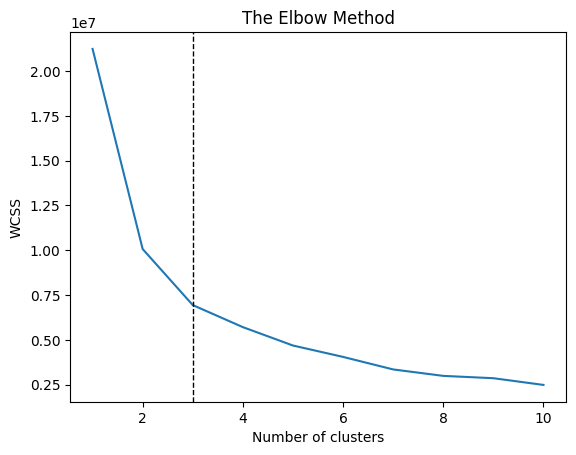

In [40]:
# K-Means++ initialization for the elbow method:
# Instead of randomly placing centroids, K-Means++ selects them strategically:
# 1. The first centroid is chosen randomly from the data points.
# 2. For each remaining centroid, the algorithm selects a point farthest from the existing centroids.
#    This spreads out the centroids across the dataset.
# 3. After initializing the centroids, K-Means proceeds with clustering as usual.
# K-Means++ improves the clustering efficiency and helps get better results when using techniques
# like the Elbow Method to find the optimal number of clusters.
wcss = []
for i in range(1, 11): # I'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**. We can see visually that with a number of clusters of 3, the descent of the WCSS value is reducing its descent.

Use of the average silhouette score method to find the optimal number of clusters:

In [1]:
# This method uses the mean of the silhouette coefficient
# It uses the mean distance to the other instances in the same cluster

# Library
from sklearn.metrics import silhouette_score

In [42]:
silhouette_score(clustering_df, kmeans.labels_)

np.float64(0.30506055705396884)

In [131]:
# Create a list of hypothetical scenarios for different number of clusters
# I'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_df) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_df, model.labels_)
                      for model in kmeans_per_k[1:]]

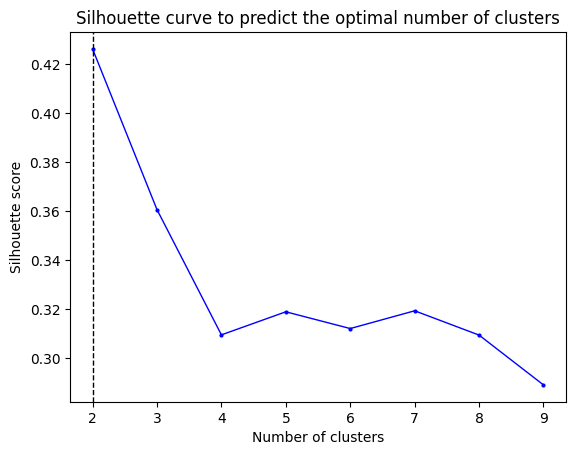

In [132]:
# Plot the silhouette scores graph
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

The optimal number of clusters according to the silhouette score is **2**.

Use of a dendrogram to find the optimal number of clusters:

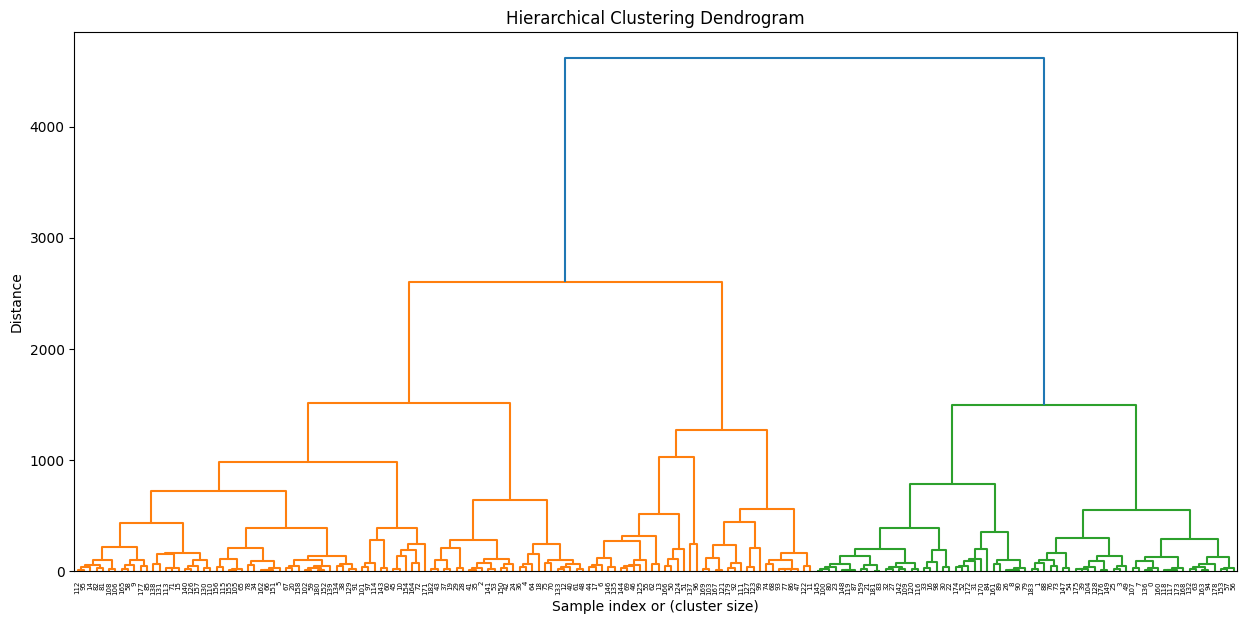

In [45]:
# Generate a dendogram
dendrogram_data = clustering_df.drop(columns=['Count'])

# Hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot of the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


The optimal number of clusters is **3**.

Use of the WCSS scores to find the optimal number of clusters:


In [46]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

WCSS (Inertia) scores for each number of clusters (1-10):
[21234229.37424516, 10065162.333431888, 6938706.796129299, 5708179.39806947, 4682156.305220308, 4046331.5756443236, 3347197.0981892804, 2988191.2085351385, 2857676.995404978, 2483394.202062825]


Overall, it is decided that the optimal number of clusters is **3**.

Let's now train the model with this number of clusters:

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_df)

Explanation of y_kmeans:

The y_kmeans variable contains the classification in a cluster of the participant / user.

For example, participant 1 is in cluster 2, participant 2 is in cluster 3 and participant 3 is in cluster 2.

In [48]:
y_kmeans

array([1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 2, 1, 2], dtype=int32)

#### Visualization of the Results

In a next step, let's visualize the clusters:

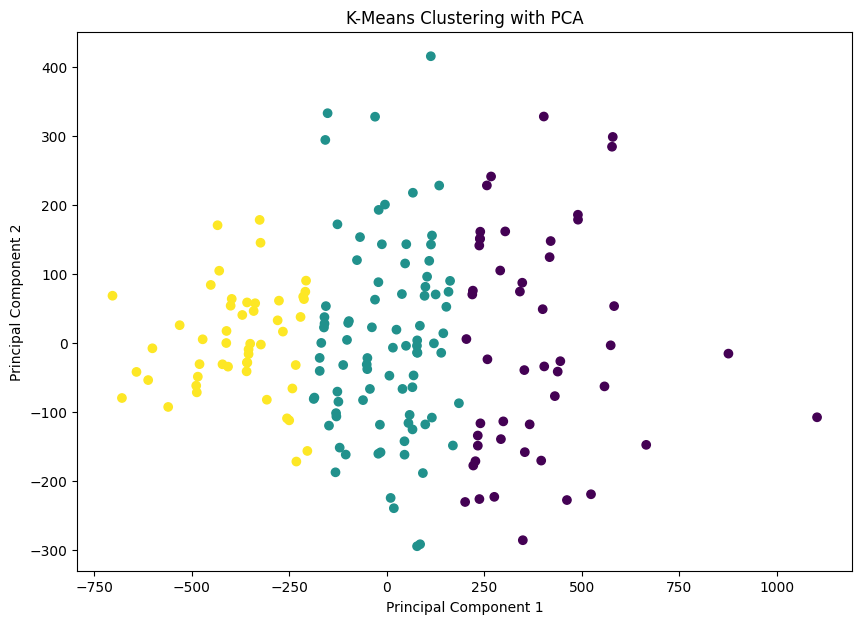

In [49]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

In [50]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_df, labels)
print("Silhouette Score:", silhouette_avg)


# Calculate inertia for each cluster
# It is possible to access the inertia for the entire clustering, but not directly for each cluster from the KMeans object
# So, I'll calculate it manually for each cluster
inertia_per_cluster = []
for i in range(kmeans.n_clusters):
    cluster_data = clustering_df[y_kmeans == i]
    inertia = ((cluster_data - kmeans.cluster_centers_[i])**2).sum().sum()
    inertia_per_cluster.append(inertia)

print("Inertia (WCSS) for each cluster:")
for i, inertia in enumerate(inertia_per_cluster):
    print(f"Cluster {i}: {inertia:.2f}")

Silhouette Score: 0.36074975205831866
Inertia (WCSS) for each cluster:
Cluster 0: 2878554.19
Cluster 1: 2805422.93
Cluster 2: 1254729.68


To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:

In [24]:
# Group the data by cluster and calculate the mean of each feature
clustering_df = pd.DataFrame(clustering_df, columns=clustering_df.columns)
clustering_df['cluster'] = y_kmeans
df_grouped = clustering_df.groupby('cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_df[clustering_df['cluster'] == 0]
cluster2_data = clustering_df[clustering_df['cluster'] == 1]
cluster3_data = clustering_df[clustering_df['cluster'] == 2]

# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 |
|---|---|---|---|
| Condition | **{cluster1_mean['Condition']:.2f}** | {cluster2_mean['Condition']:.2f} | **{cluster3_mean['Condition']:.2f}** | {cluster4_mean['Condition']:.2f} |
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | {cluster3_mean['AmountPatientRatio']:.2f} | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | {cluster3_mean['TimePatientSeconds']:.2f} | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | **{cluster2_mean['Request']:.2f}** | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | **{cluster3_mean['Statement']:.2f}** | {cluster4_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | {cluster3_mean['Differentiate']:.2f} | **{cluster4_mean['Differentiate']:.2f}** |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| Q-type: Support diagnostics | {cluster1_mean['SupportDiagnostics']:.2f} | {cluster2_mean['SupportDiagnostics']:.2f} | **{cluster3_mean['SupportDiagnostics']:.2f}** | {cluster4_mean['SupportDiagnostics']:.2f} |
| Q-type: Support management | {cluster1_mean['SupportManagement']:.2f} | {cluster2_mean['SupportManagement']:.2f} | **{cluster3_mean['SupportManagement']:.2f}** | {cluster4_mean['SupportManagement']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | **{cluster2_mean['AmountDiagnosesMentioned']:.2f}** | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} |
| Amount of excluded diagnoses | **{cluster1_mean['AmountDiagnosesExcluded']:.2f}** | **{cluster2_mean['AmountDiagnosesExcluded']:.2f}** | {cluster3_mean['AmountDiagnosesExcluded']:.2f} | {cluster4_mean['AmountDiagnosesExcluded']:.2f} |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | **{cluster3_mean['DurationInteractionSeconds']:.2f}** | {cluster4_mean['DurationInteractionSeconds']:.2f} |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | **{cluster3_mean['AmountInteraction']:.2f}** | {cluster4_mean['AmountInteraction']:.2f} |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | 
|---|---|---|---|
| Condition | **0.24** | 0.48 | **0.78** | nan |
| Ratio of patient information | 0.87 | **0.84** | 0.85 | **nan** |
| Time of patient information (in seconds) | 353.06 | **268.45** | 186.96 | **nan** |
| Q-type: Technical question | 1.18 | 0.72 | **0.47** | nan |
| Q-type: Request | 1.22 | **1.00** | 0.96 | nan |
| Q-type: Statement | 2.08 | 1.27 | **0.33** | nan |
| Q-type: Differentiate | 0.31 | 0.20 | 0.16 | **nan** |
| Q-type: Exclude | 1.94 | 1.79 | **0.82** | nan |
| Q-type: Support diagnostics | 0.08 | 0.05 | **0.00** | nan |
| Q-type: Support management | 0.14 | 0.06 | **0.00** | nan |
| First question was self-formulated (and not copied) | 0.90 | 0.84 | 0.82 | nan |
| Amount of mentioned diagnoses | **9.00** | **8.38** | 5.31 | nan |
| Amount of excluded diagnoses | **0.20** | **0.23** | 0.02 | nan |
| Duration of the total chat interaction (in seconds) | **1135.35** | 760.08 | **390.10** | nan |
| Amount of interactions in the chat | **28.61** | 19.55 | **8.20** | nan |


#### Dimensionality Reduction - UMAP Version

In [25]:
import umap.umap_ as umap
from sklearn.impute import SimpleImputer

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [26]:
# Calculate explained variance ratio for UMAP
# 'embedding' object from the previous UMAP step is available
if 'reducer' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8275
Principal Component 2: 0.1477


Use of the elbow method to find the optimal number of clusters:

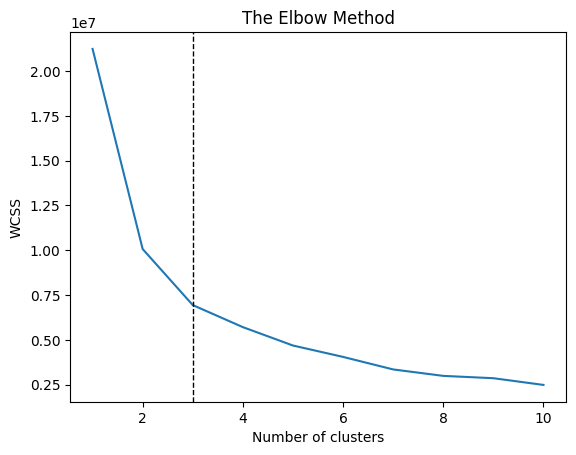

In [54]:
# K-Means++ initialization for the elbow method:
# Instead of randomly placing centroids, K-Means++ selects them strategically:
# 1. The first centroid is chosen randomly from the data points.
# 2. For each remaining centroid, the algorithm selects a point farthest from the existing centroids.
#    This spreads out the centroids across the dataset.
# 3. After initializing the centroids, K-Means proceeds with clustering as usual.
# K-Means++ improves the clustering efficiency and helps get better results when using techniques
# like the Elbow Method to find the optimal number of clusters.
wcss = []
for i in range(1, 11): # I'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**. We can see visually that with a number of clusters of 3, the descent of the WCSS value is reducing its descent.

Use of the average silhouette score method to find the optimal number of clusters:

In [55]:
# Create a list of hypothetical scenarios for different number of clusters
# I'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_df) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_df, model.labels_)
                      for model in kmeans_per_k[1:]]

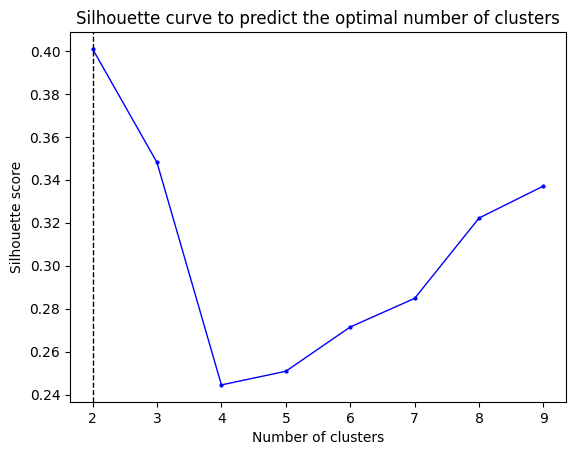

In [128]:
# Plot the silhouette scores graph
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

The optimal number of clusters according to the average silhouette score method is **2**.

Use of a dendrogram to find the optimal number of clusters:


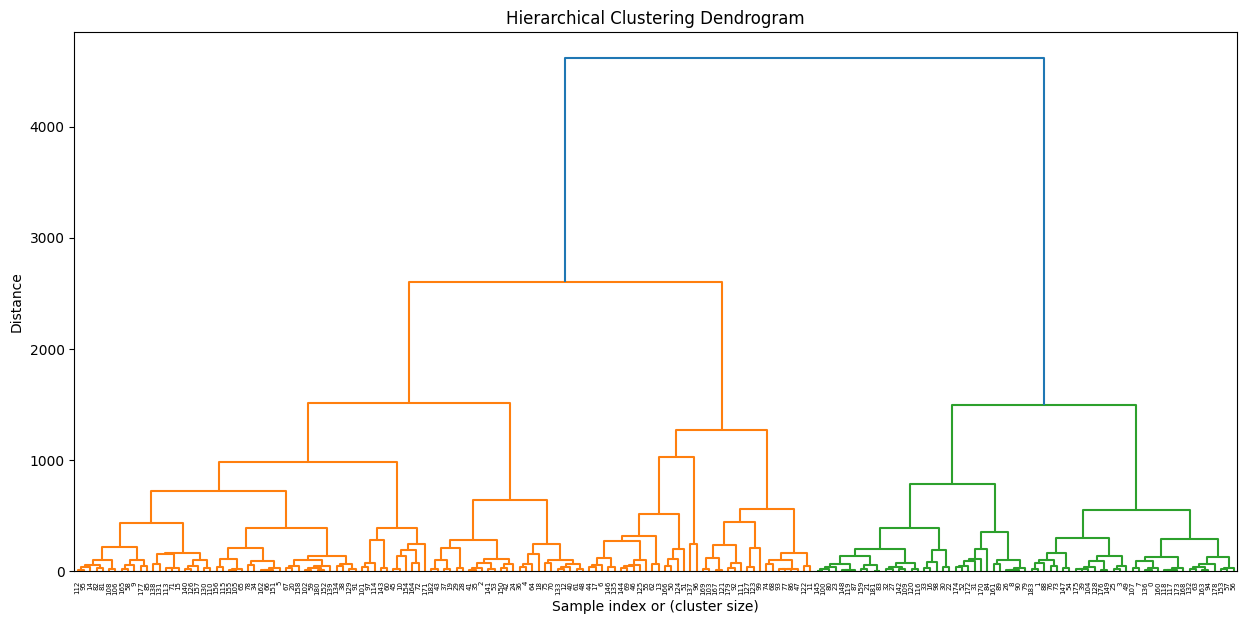

In [57]:
# Generate a dendrogram
dendrogram_data = clustering_df.drop(columns=['Count'])

# Hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

The optimal number of clusters is **3**.

Use of the WCSS scores to find the optimal number of clusters:

In [58]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

WCSS (Inertia) scores for each number of clusters (1-10):
[21234327.37424516, 10065208.082219593, 6938706.796129299, 5708200.518439839, 4682180.484707483, 4046347.8323241677, 3347210.4547640425, 2988199.9088531034, 2857686.348579581, 2483404.4999260744]


Overall, it is decided that the optimal number of clusters is **3**.

Let's now train the model with this number of clusters:

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_df)

#### Visualization of the Results

In a next step, let's visualize the clusters:

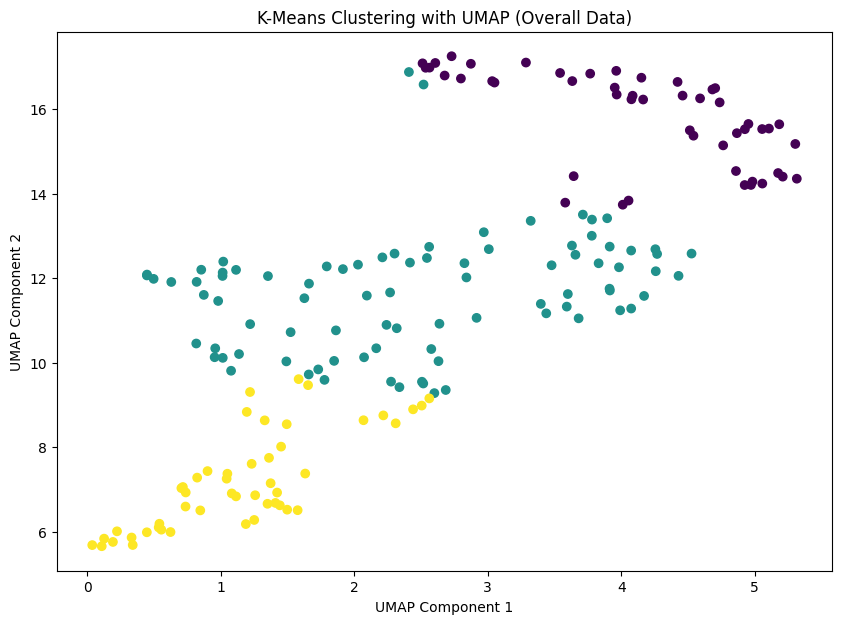

In [ ]:
# Use the labels from the overall clustering
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP (Overall Data)')
plt.show()

In [61]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_df, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3607528205695143


To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:

In [29]:
# Group the data by cluster and calculate the mean of each feature
clustering_df = pd.DataFrame(clustering_df, columns=clustering_df.columns)
clustering_df['cluster'] = y_kmeans
df_grouped = clustering_df.groupby('cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_df[clustering_df['cluster'] == 0]
cluster2_data = clustering_df[clustering_df['cluster'] == 1]
cluster3_data = clustering_df[clustering_df['cluster'] == 2]

# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 |
|---|---|---|---|
| Condition | **{cluster1_mean['Condition']:.2f}** | {cluster2_mean['Condition']:.2f} | **{cluster3_mean['Condition']:.2f}** | {cluster4_mean['Condition']:.2f} |
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | {cluster3_mean['AmountPatientRatio']:.2f} | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | {cluster3_mean['TimePatientSeconds']:.2f} | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | **{cluster2_mean['Request']:.2f}** | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | **{cluster3_mean['Statement']:.2f}** | {cluster4_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | {cluster3_mean['Differentiate']:.2f} | **{cluster4_mean['Differentiate']:.2f}** |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| Q-type: Support diagnostics | {cluster1_mean['SupportDiagnostics']:.2f} | {cluster2_mean['SupportDiagnostics']:.2f} | **{cluster3_mean['SupportDiagnostics']:.2f}** | {cluster4_mean['SupportDiagnostics']:.2f} |
| Q-type: Support management | {cluster1_mean['SupportManagement']:.2f} | {cluster2_mean['SupportManagement']:.2f} | **{cluster3_mean['SupportManagement']:.2f}** | {cluster4_mean['SupportManagement']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | **{cluster2_mean['AmountDiagnosesMentioned']:.2f}** | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} |
| Amount of excluded diagnoses | **{cluster1_mean['AmountDiagnosesExcluded']:.2f}** | **{cluster2_mean['AmountDiagnosesExcluded']:.2f}** | {cluster3_mean['AmountDiagnosesExcluded']:.2f} | {cluster4_mean['AmountDiagnosesExcluded']:.2f} |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | **{cluster3_mean['DurationInteractionSeconds']:.2f}** | {cluster4_mean['DurationInteractionSeconds']:.2f} |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | **{cluster3_mean['AmountInteraction']:.2f}** | {cluster4_mean['AmountInteraction']:.2f} |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 |
|---|---|---|---|
| Condition | **0.24** | 0.48 | **0.78** | nan |
| Ratio of patient information | 0.87 | **0.84** | 0.85 | **nan** |
| Time of patient information (in seconds) | 353.06 | **268.45** | 186.96 | **nan** |
| Q-type: Technical question | 1.18 | 0.72 | **0.47** | nan |
| Q-type: Request | 1.22 | **1.00** | 0.96 | nan |
| Q-type: Statement | 2.08 | 1.27 | **0.33** | nan |
| Q-type: Differentiate | 0.31 | 0.20 | 0.16 | **nan** |
| Q-type: Exclude | 1.94 | 1.79 | **0.82** | nan |
| Q-type: Support diagnostics | 0.08 | 0.05 | **0.00** | nan |
| Q-type: Support management | 0.14 | 0.06 | **0.00** | nan |
| First question was self-formulated (and not copied) | 0.90 | 0.84 | 0.82 | nan |
| Amount of mentioned diagnoses | **9.00** | **8.38** | 5.31 | nan |
| Amount of excluded diagnoses | **0.20** | **0.23** | 0.02 | nan |
| Duration of the total chat interaction (in seconds) | **1135.35** | 760.08 | **390.10** | nan |
| Amount of interactions in the chat | **28.61** | 19.55 | **8.20** | nan |


#### Interpretation

The interpretation of the three identified clusters can be found in the final project report.


### K-means for the Condition ChatGPT

UMAP to reduce dimensionality:

In [65]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt)
principalDf = pd.DataFrame(data = embedding
             , columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [66]:
# Calculate explained variance ratio for UMAP
# 'embedding' object from the previous UMAP step is available
if 'reducer' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8275
Principal Component 2: 0.1477


Use of the elbow method to find the optimal number of clusters:

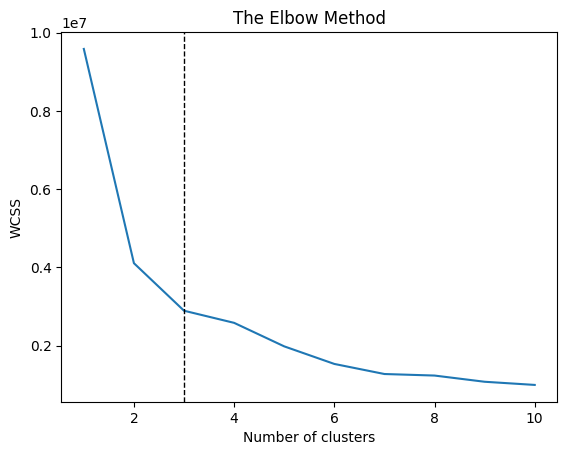

In [67]:
wcss = []
for i in range(1, 11): # I'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_gpt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**.

Use of the average silhouette score method to find the optimal number of clusters:

In [68]:
# Create a list of hypothetical scenarios for different number of clusters
# I'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_gpt) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_gpt, model.labels_)
                      for model in kmeans_per_k[1:]]

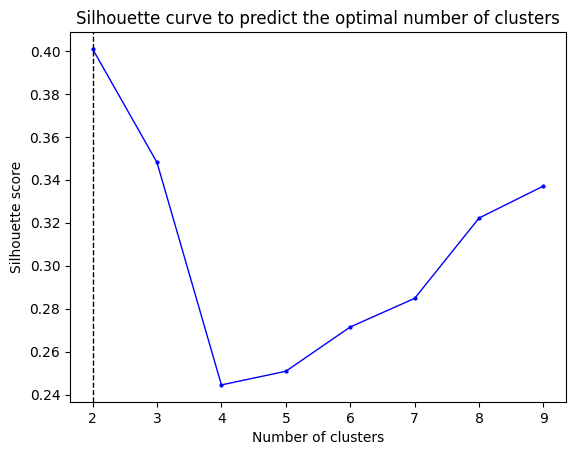

In [127]:
# Plot the silhouette scores graph
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

The optimal number of clusters according to the average silhouette score method is **2**.

Use of a dendrogram to find the optimal number of clusters:

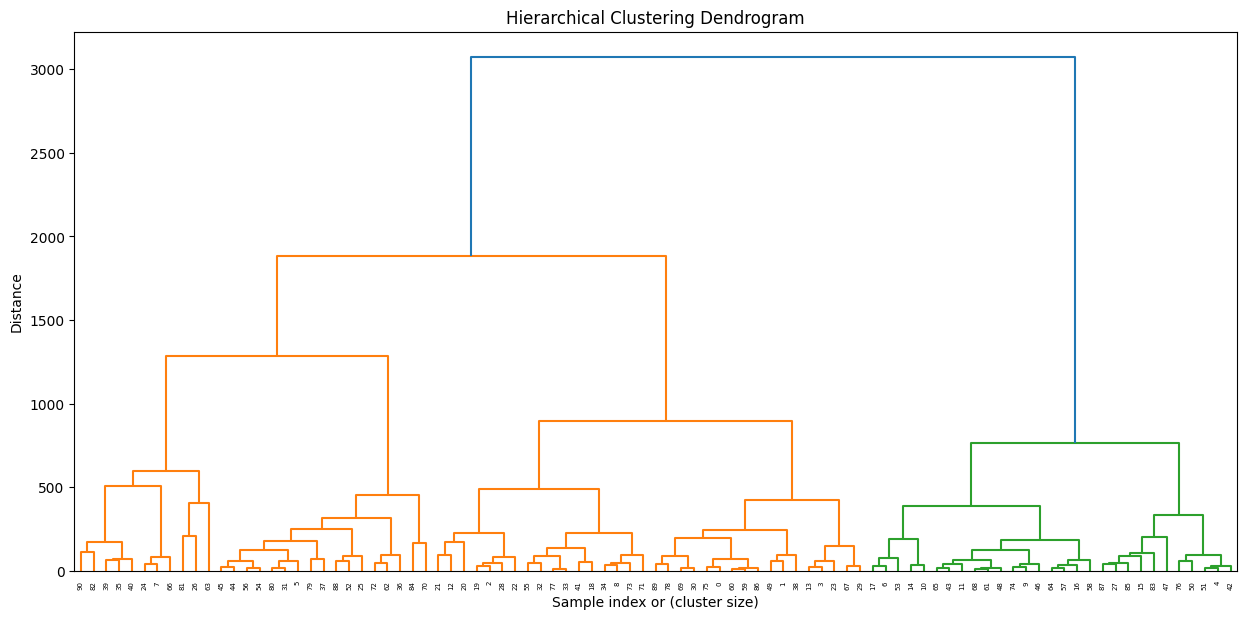

In [70]:
# Generate a dendrogram
dendrogram_data = clustering_gpt.drop(columns=['Count'])

# Hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

The optimal number of clusters is **3**. Four clusters could potentially be an equally good fitting number of clusters.

Use of the WCSS scores to find the optimal number of clusters:

In [71]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

WCSS (Inertia) scores for each number of clusters (1-10):
[9582775.542735036, 4105981.6352487626, 2891097.7063186397, 2580995.7264307463, 1979939.3763409918, 1530913.2757147471, 1273294.9656753384, 1234026.1057393665, 1075329.1480396595, 994517.840169289]


Overall, it is decided that the optimal number of clusters is **3**. (The k-means was also run with the number of four clusters, but better results of the clusters could be found with three clusters).

Train the model with this number of clusters:

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_gpt)

#### Visualization of the Results

Visualization of the clusters:

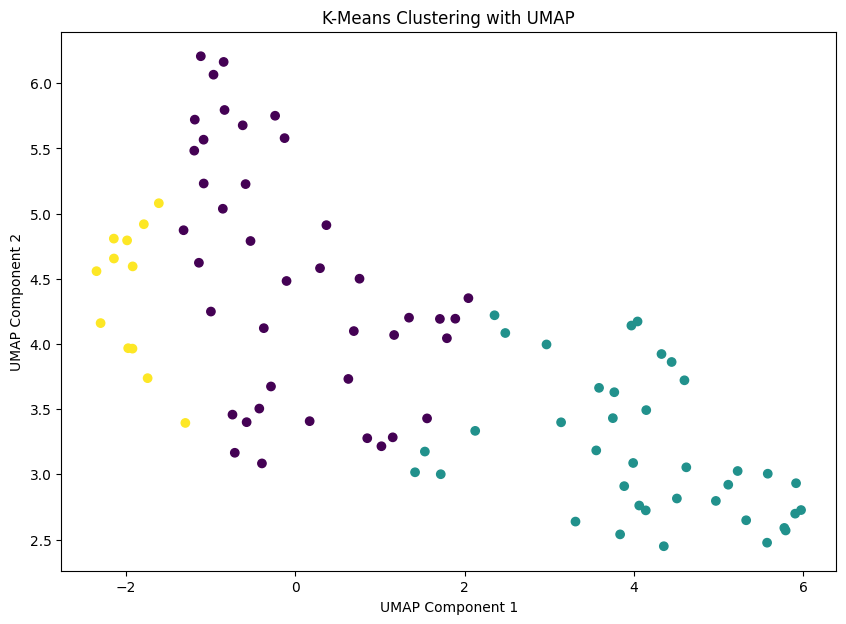

In [ ]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP')
plt.show()

In [74]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_gpt, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4105274146122514


Distribution of the values for each cluster:

In [31]:
# Group the data by cluster and calculate the mean of each feature
clustering_gpt['cluster'] = y_kmeans
df_grouped = clustering_gpt.groupby('cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_gpt[clustering_gpt['cluster'] == 0]
cluster2_data = clustering_gpt[clustering_gpt['cluster'] == 1]
cluster3_data = clustering_gpt[clustering_gpt['cluster'] == 2]
cluster4_data = clustering_gpt[clustering_gpt['cluster'] == 3]

# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 |
|---|---|---|---|
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | {cluster2_mean['AmountPatientRatio']:.2f} | **{cluster3_mean['AmountPatientRatio']:.2f}** | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | {cluster2_mean['TimePatientSeconds']:.2f} | **{cluster3_mean['TimePatientSeconds']:.2f}** | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | {cluster2_mean['Request']:.2f} | **{cluster3_mean['Request']:.2f}** | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | {cluster3_mean['Statement']:.2f} | **{cluster4_mean['Statement']:.2f}** |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | **{cluster2_mean['Differentiate']:.2f}** | {cluster3_mean['Differentiate']:.2f} | {cluster4_mean['Differentiate']:.2f} |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| Q-type: Support diagnostics | {cluster1_mean['SupportDiagnostics']:.2f} | {cluster2_mean['SupportDiagnostics']:.2f} | **{cluster3_mean['SupportDiagnostics']:.2f}** | {cluster4_mean['SupportDiagnostics']:.2f} |
| Q-type: Support management | {cluster1_mean['SupportManagement']:.2f} | {cluster2_mean['SupportManagement']:.2f} | **{cluster3_mean['SupportManagement']:.2f}** | {cluster4_mean['SupportManagement']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | {cluster2_mean['AmountDiagnosesMentioned']:.2f} | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | **{cluster4_mean['AmountDiagnosesMentioned']:.2f}** |
| Amount of excluded diagnoses | **{cluster1_mean['AmountDiagnosesExcluded']:.2f}** | {cluster2_mean['AmountDiagnosesExcluded']:.2f} | {cluster3_mean['AmountDiagnosesExcluded']:.2f} | **{cluster4_mean['AmountDiagnosesExcluded']:.2f}** |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | {cluster3_mean['DurationInteractionSeconds']:.2f} | **{cluster4_mean['DurationInteractionSeconds']:.2f}** |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | {cluster3_mean['AmountInteraction']:.2f} | **{cluster4_mean['AmountInteraction']:.2f}** |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | 
|---|---|---|---|
| Ratio of patient information | 0.84 | 0.86 | **0.92** | **nan** |
| Time of patient information (in seconds) | 299.24 | 180.79 | **370.58** | **nan** |
| Q-type: Technical question | 0.56 | 0.53 | **1.25** | nan |
| Q-type: Request | 1.22 | 1.11 | **1.67** | nan |
| Q-type: Statement | 1.22 | 0.29 | 1.33 | **nan** |
| Q-type: Differentiate | 0.17 | **0.18** | 0.42 | nan |
| Q-type: Exclude | 1.93 | 0.82 | **2.00** | nan |
| Q-type: Support diagnostics | 0.05 | 0.00 | **0.33** | nan |
| Q-type: Support management | 0.02 | 0.00 | **0.42** | nan |
| First question was self-formulated (and not copied) | 0.73 | 0.76 | 0.92 | nan |
| Amount of mentioned diagnoses | **12.32** | 6.16 | 16.75 | **nan** |
| Amount of excluded diagnoses | **0.27** | 0.03 | 0.00 | **nan** |
| Duration of the total chat interaction (in seconds) | **756.27** | 370.84 | 1134.42 | **nan** |
| Amount of interactions in the chat | **17.93** | 7.97 | 23.33 | **nan** |


#### Interpretation

The interpretation of the three identified clusters can be found in the final project report.


### K-means for the Condition Human Expert

UMAP to reduce the dimensionality:

In [76]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_human)
principalDf = pd.DataFrame(data = embedding
             , columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [77]:
# Calculate explained variance ratio for UMAP
# 'embedding' object from the previous UMAP step is available
if 'reducer' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8275
Principal Component 2: 0.1477


Use of the elbow method to find the optimal number of clusters:

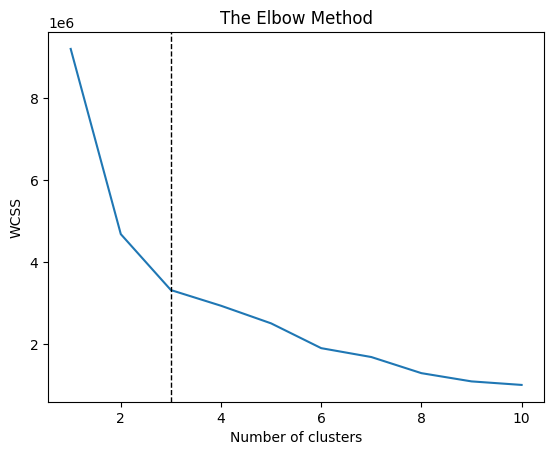

In [78]:
wcss = []
for i in range(1, 11): # I'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_human)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**.

Use of the average silhouette score method to find the optimal number of clusters:

In [129]:
# Create a list of hypothetical scenarios for different number of clusters
# I'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_human) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_human, model.labels_)
                      for model in kmeans_per_k[1:]]

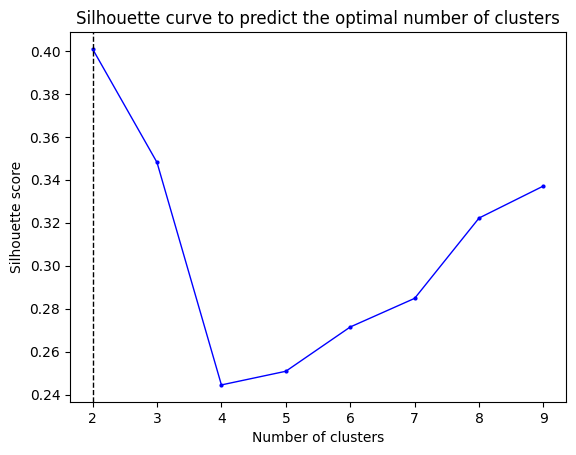

In [130]:
# Plot the silhouette scores graph
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

According to the average silhouette score method, the optimal number of clusters is **2**.

Use of a dendrogram to find the optimal number of clusters:

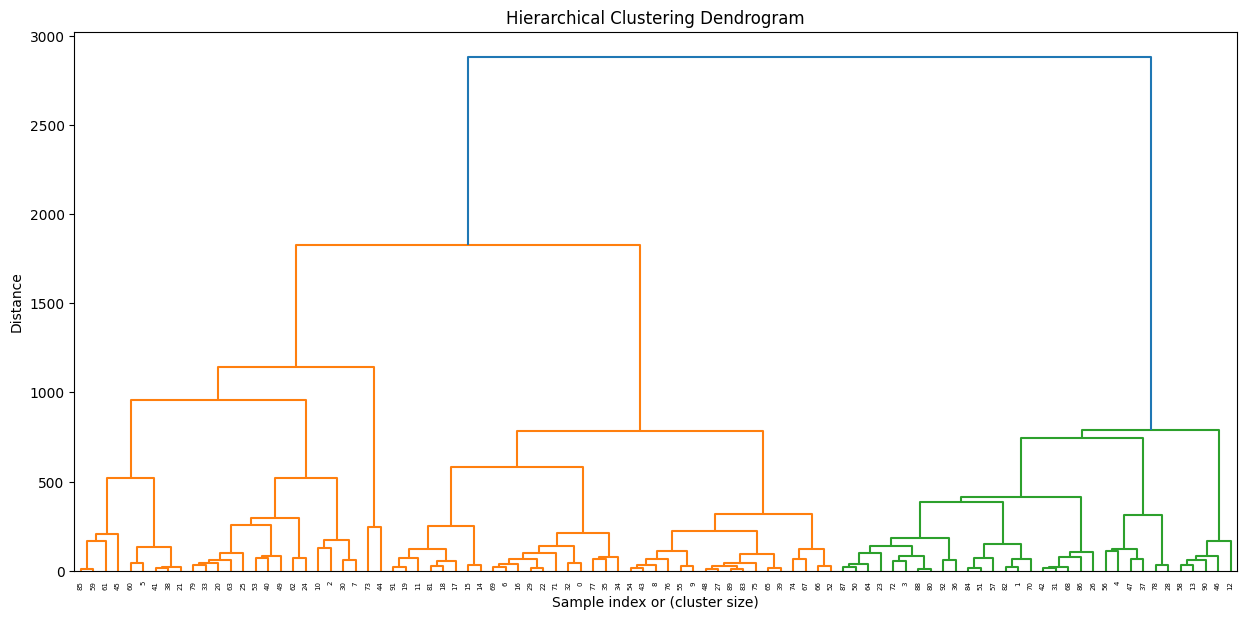

In [81]:
# Generate a dendrogram
dendrogram_data = clustering_human.drop(columns=['Count'])

# Hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

The optimal number of clusters according to the dendrogram is **3**.

Overall, it is decided that the optimal number of clusters is **3**.

Train the model with this number of clusters:

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_human)

#### Visualization of the Results

Visualization of the clusters:

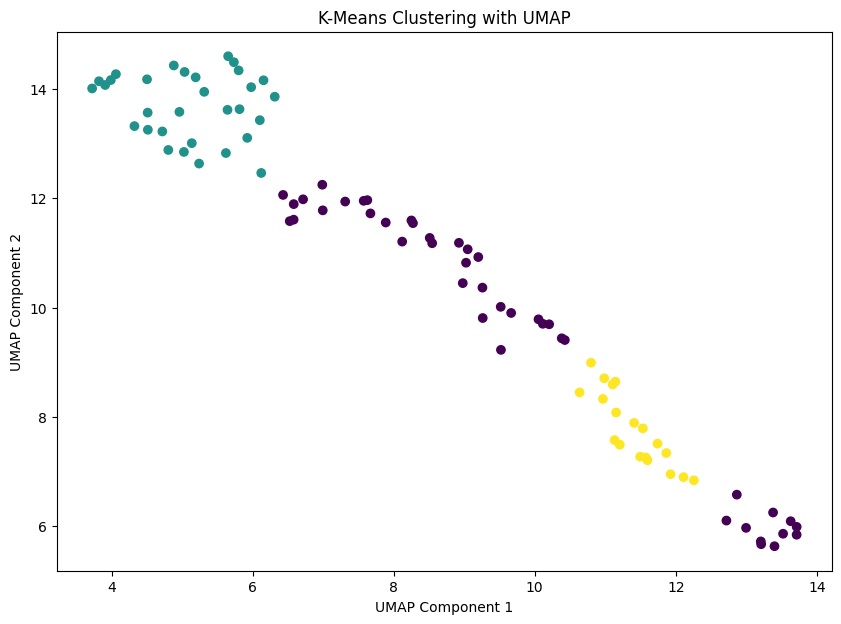

In [83]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP')
plt.show()

In [84]:
silhouette_avg = silhouette_score(clustering_human, labels)
print("Silhouette Score:", silhouette_avg)

print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

Silhouette Score: 0.3480858608833841
WCSS (Inertia) scores for each number of clusters (1-10):
[9192709.17921147, 4682609.812786635, 3320300.1568879043, 2938425.367675546, 2509433.9877712517, 1905709.2817360095, 1689574.1461823904, 1296949.1272386617, 1096347.5538476766, 1010451.5665080036]


Distribution of the values for each cluster:

In [34]:
# Group the data by cluster and calculate the mean of each feature
clustering_human['cluster'] = y_kmeans
df_grouped = clustering_human.groupby('cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_human[clustering_human['cluster'] == 0]
cluster2_data = clustering_human[clustering_human['cluster'] == 1]
cluster3_data = clustering_human[clustering_human['cluster'] == 2]

# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()


# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 |
|---|---|---|---|
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | **{cluster3_mean['AmountPatientRatio']:.2f}** | {cluster4_mean['AmountPatientRatio']:.2f} | {cluster5_mean['AmountPatientRatio']:.2f} |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | **{cluster3_mean['TimePatientSeconds']:.2f}** | {cluster4_mean['TimePatientSeconds']:.2f} | {cluster5_mean['TimePatientSeconds']:.2f} |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | **{cluster4_mean['TechnicalQuestion']:.2f}** | {cluster5_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | **{cluster1_mean['Request']:.2f}** | {cluster2_mean['Request']:.2f} | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} | {cluster5_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | {cluster3_mean['Statement']:.2f} | **{cluster4_mean['Statement']:.2f}** | {cluster5_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | **{cluster3_mean['Differentiate']:.2f}** | {cluster4_mean['Differentiate']:.2f} | {cluster5_mean['Differentiate']:.2f} |
| Q-type: Exclude | **{cluster1_mean['Exclude']:.2f}** | {cluster2_mean['Exclude']:.2f} | {cluster3_mean['Exclude']:.2f} | {cluster4_mean['Exclude']:.2f} | {cluster5_mean['Exclude']:.2f} |
| Q-type: Support diagnostics | {cluster1_mean['SupportDiagnostics']:.2f} | {cluster2_mean['SupportDiagnostics']:.2f} | **{cluster3_mean['SupportDiagnostics']:.2f}** | {cluster4_mean['SupportDiagnostics']:.2f} |
| Q-type: Support management | {cluster1_mean['SupportManagement']:.2f} | {cluster2_mean['SupportManagement']:.2f} | **{cluster3_mean['SupportManagement']:.2f}** | {cluster4_mean['SupportManagement']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} | {cluster5_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | {cluster2_mean['AmountDiagnosesMentioned']:.2f} | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} | **{cluster5_mean['AmountDiagnosesMentioned']:.2f}** |
| Amount of excluded diagnoses | **{cluster1_mean['AmountDiagnosesExcluded']:.2f}** | {cluster2_mean['AmountDiagnosesExcluded']:.2f} | {cluster3_mean['AmountDiagnosesExcluded']:.2f} | {cluster4_mean['AmountDiagnosesExcluded']:.2f} | **{cluster5_mean['AmountDiagnosesExcluded']:.2f}** |
| Duration of the total chat interaction (in seconds) | {cluster1_mean['DurationInteractionSeconds']:.2f} | {cluster2_mean['DurationInteractionSeconds']:.2f} | {cluster3_mean['DurationInteractionSeconds']:.2f} | **{cluster4_mean['DurationInteractionSeconds']:.2f}** | **{cluster5_mean['DurationInteractionSeconds']:.2f}** |
| Amount of interactions in the chat | {cluster1_mean['AmountInteraction']:.2f} | **{cluster2_mean['AmountInteraction']:.2f}** | {cluster3_mean['AmountInteraction']:.2f} | {cluster4_mean['AmountInteraction']:.2f} | **{cluster5_mean['AmountInteraction']:.2f}** |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 |
|---|---|---|---|
| Ratio of patient information | 0.81 | **0.86** | **0.89** | nan | nan |
| Time of patient information (in seconds) | 251.74 | **246.39** | **394.68** | nan | nan |
| Q-type: Technical question | 0.86 | 0.65 | **1.47** | **nan** | nan |
| Q-type: Request | **1.00** | 0.61 | 1.00 | nan | nan |
| Q-type: Statement | 1.86 | 0.90 | 2.21 | **nan** | nan |
| Q-type: Differentiate | 0.23 | 0.16 | **0.32** | nan | nan |
| Q-type: Exclude | **1.91** | 1.13 | 2.00 | nan | nan |
| Q-type: Support diagnostics | 0.00 | 0.06 | **0.00** | nan |
| Q-type: Support management | 0.09 | 0.00 | **0.11** | nan |
| First question was self-formulated (and not copied) | 0.88 | 0.97 | 0.95 | nan | nan |
| Amount of mentioned diagnoses | **5.47** | 3.71 | 6.95 | nan | **nan** |
| Amount of excluded diagnoses | **0.26** | 0.06 | 0.32 | nan | **nan** |
| Duration of the total chat interaction (in seconds) | 920.26 | 579.81 | 1255.63 | **nan** | **nan** |
| Amount of interactions in the chat | 24.98 | **14.19** | 34.37 | nan | **nan** |


#### Interpretation

The interpretation of the three identified clusters can be found in the final project report.

### Further models

In this final project, further models, additional to the k-means models, will be tested to gain more insightful results. To find the right models to cluster the final data sample, the following illustration can be used as a support. The illustration shows how different techniques and models create clusters differently. With this, the optimal models to implement can be chosen, according to the distribution of the data points after the dimensionality reduction.

Possible further models for our data could for example be the DBSCAN.


![Different Clustering Models](https://github.com/Mayra-N-S/CAS_ADS/blob/main/Final%20Project/Assignment/DifferentClusteringModels.jpg?raw=1)

### DBSCAN

In [35]:
# Create a dataframe with the necessary variables
clustering_df2 = df2[['Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'DurationInteractionSeconds', 'AmountInteraction']]

# Create a binary column for the variable 'Condition'
# 1 = ChatGPT, 0 = Human expert
clustering_df2['Condition'] = clustering_df2['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

# Check if it worked
#print(clustering_df2)

In [36]:
#Create two subsets for each condition
clustering_gpt2 = clustering_df2[clustering_df2['Condition'] == 1]
clustering_human2 = clustering_df2[clustering_df2['Condition'] == 0]

#Check if it worked
clustering_gpt2.head()
clustering_human2.head()

Condition  AmountPatientRatio  TimePatientSeconds  TechnicalQuestion  \
4           0            0.166667                 111                0.0   
5           0            0.333333                 205                0.0   
6           0            0.500000                 201                0.0   
7           0            0.833333                 182                1.0   
10          0            0.833333                 464                1.0   

    Request  Statement  Differentiate  Exclude  FirstQuestionSelf  \
4       2.0        2.0            0.0      3.0                0.0   
5       1.0        4.0            0.0      1.0                0.0   
6       1.0        1.0            0.0      3.0                1.0   
7       0.0        1.0            0.0      4.0                1.0   
10      0.0        0.0            0.0      0.0                1.0   

    AmountDiagnosesMentioned  DurationInteractionSeconds  AmountInteraction  
4                        7.0                        1041                 28  
5                        9.0                         731                 28  
6                        3.0                        1183                 28  
7                        2.0                         651                 15  
10                       0.0                         695                  6

In [37]:
#Check if there are missing values in the data frames
print(clustering_df2.isna().sum())

print(clustering_gpt2.isna().sum())
print(clustering_human2.isna().sum())
#No, there are no missing values left


Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
DurationInteractionSeconds    0
AmountInteraction             0
dtype: int64
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
DurationInteractionSeconds    0
AmountInteraction             0
dtype: int64
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate 

In [89]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


As a guide to tune the parameter 'eps' the K-nearest neighbor distance is used:

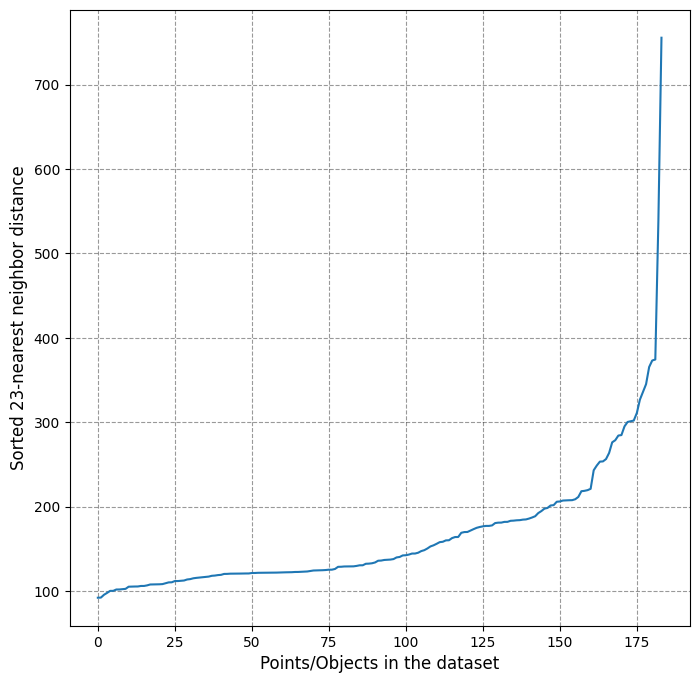

In [90]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(clustering_df2)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(clustering_df2)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * clustering_df2.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=clustering_df2, k=k)

#### Visualization of the Results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


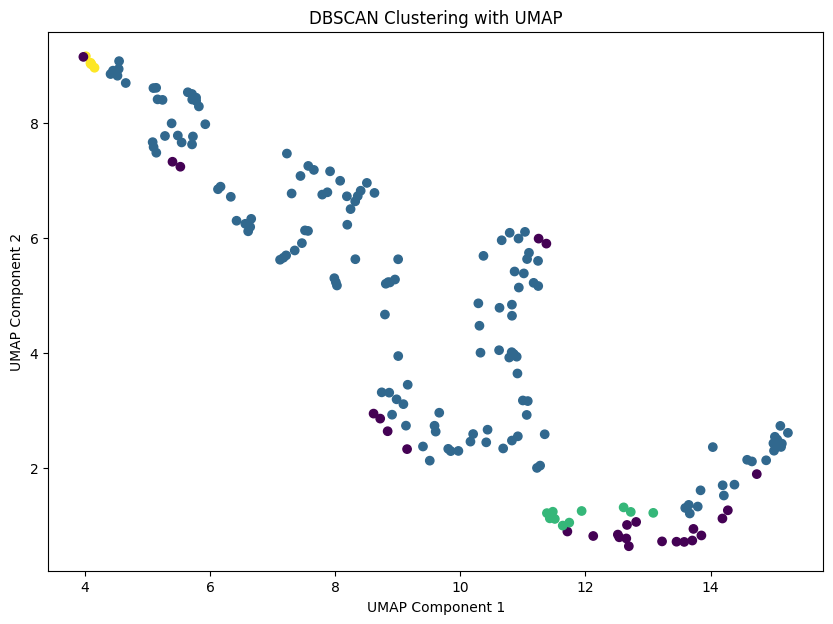

Estimated number of clusters: 3
Estimated number of noise points: 26
Silhouette Score: 0.0013905823471300357

Mean values for each DBSCAN cluster (excluding noise):


/tmp/ipython-input-92-343187767.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df2['dbscan_cluster'] = dbscan_labels


Condition  AmountPatientRatio  TimePatientSeconds  \
dbscan_cluster                                                      
0                 0.51049            0.843823          236.783217   
1                 0.40000            0.983333          462.600000   
2                 1.00000            0.733333           72.800000   

                TechnicalQuestion   Request  Statement  Differentiate  \
dbscan_cluster                                                          
0                         0.72028  1.013986   1.125874       0.202797   
1                         1.10000  1.900000   1.700000       0.500000   
2                         0.40000  1.000000   0.000000       0.200000   

                 Exclude  FirstQuestionSelf  AmountDiagnosesMentioned  \
dbscan_cluster                                                          
0               1.566434           0.839161                  7.496503   
1               2.500000           1.000000                 12.600000   
2               0.000000           0.800000                  3.600000   

                DurationInteractionSeconds  AmountInteraction  
dbscan_cluster                                                 
0                               713.629371          17.202797  
1                              1013.700000          26.300000  
2                               171.600000           5.000000

In [92]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply DBSCAN
dbscan = DBSCAN(eps=74, min_samples=4) # Default parameter values: 0.5 and 5, then I tuned eps and min_samples
dbscan_labels = dbscan.fit_predict(clustering_df2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=dbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate the silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_df2):
    silhouette_avg = silhouette_score(clustering_df2, dbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for DBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add DBSCAN labels to the dataframe
clustering_df2['dbscan_cluster'] = dbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_dbscan = clustering_df2[clustering_df2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()

print("\nMean values for each DBSCAN cluster (excluding noise):")
df_grouped_dbscan

### DBSCAN for the condition ChatGPT

In [38]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt2)
principalDf = pd.DataFrame(data = embedding
             , columns = ['umap component 1', 'umap component 2'])

As a guide to tune the parameter 'eps' the K-nearest neighbor distance is used:

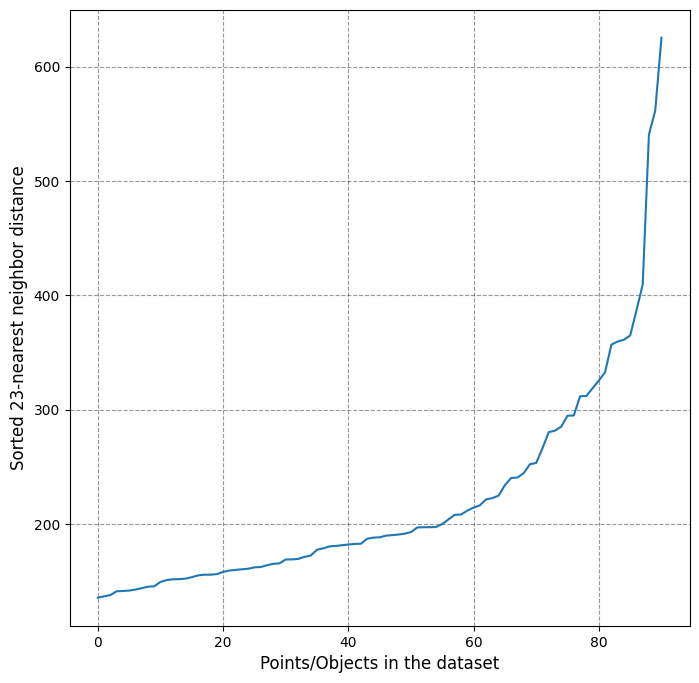

In [96]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(clustering_gpt2)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(clustering_gpt2)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * clustering_gpt2.shape[-1] - 1
get_kdist_plot(X=clustering_gpt2, k=k)

#### Visualization of the Results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


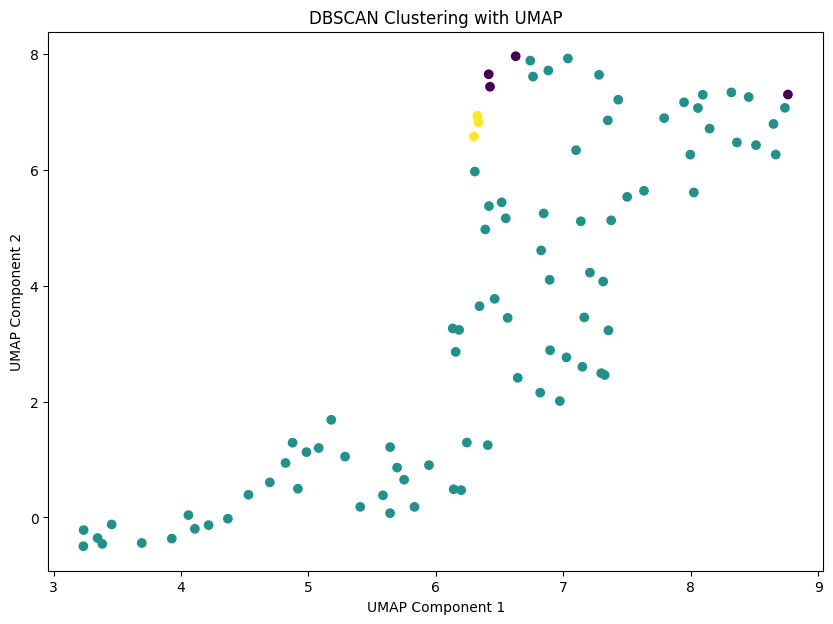

Estimated number of clusters: 2
Estimated number of noise points: 4
Silhouette Score: 0.28862431317031756

Mean values for each DBSCAN cluster (excluding noise):


/tmp/ipython-input-103-2736022780.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_gpt2['dbscan_cluster'] = dbscan_labels


Condition  AmountPatientRatio  TimePatientSeconds  \
dbscan_cluster                                                      
0                     1.0            0.855159          248.214286   
1                     1.0            0.722222          211.333333   

                TechnicalQuestion   Request  Statement  Differentiate  \
dbscan_cluster                                                          
0                        0.630952  1.214286   0.773810        0.22619   
1                        1.666667  1.333333   0.666667        0.00000   

                 Exclude  FirstQuestionSelf  AmountDiagnosesMentioned  \
dbscan_cluster                                                          
0               1.452381           0.761905                  9.833333   
1               2.333333           0.666667                 17.333333   

                DurationInteractionSeconds  AmountInteraction  
dbscan_cluster                                                 
0                               601.738095          14.142857  
1                              1121.333333          16.666667

In [103]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply DBSCAN
dbscan = DBSCAN(eps=124, min_samples=3) # Default parameter values: 0.5 and 5, then I tuned eps and min_samples --> Results for eps: 76 = 4 clusters und 11 noise points / 80  and 78 = 3 clusters und 11 noise points / 124 = 2 clusters und 4 noise points
dbscan_labels = dbscan.fit_predict(clustering_gpt2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=dbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate the silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_gpt2):
    silhouette_avg = silhouette_score(clustering_gpt2, dbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for DBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add DBSCAN labels to the dataframe
clustering_gpt2['dbscan_cluster'] = dbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_dbscan = clustering_gpt2[clustering_gpt2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()

print("\nMean values for each DBSCAN cluster (excluding noise):")
df_grouped_dbscan

### DBSCAN for the Condition Human Expert

As a guide to tune the parameter 'eps' the K-nearest neighbor distance is used:

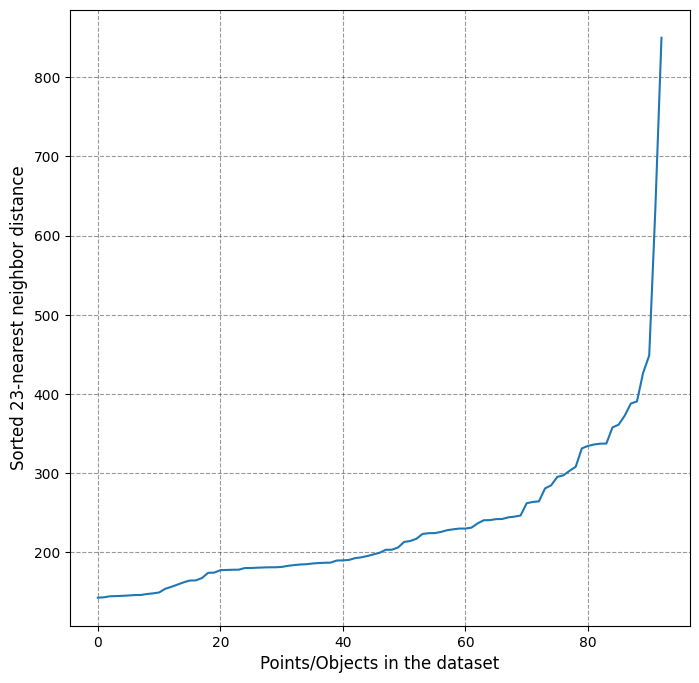

In [104]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(clustering_human2)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(clustering_human2)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * clustering_human2.shape[-1] - 1
get_kdist_plot(X=clustering_human2, k=k)

#### Visualization of the Results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


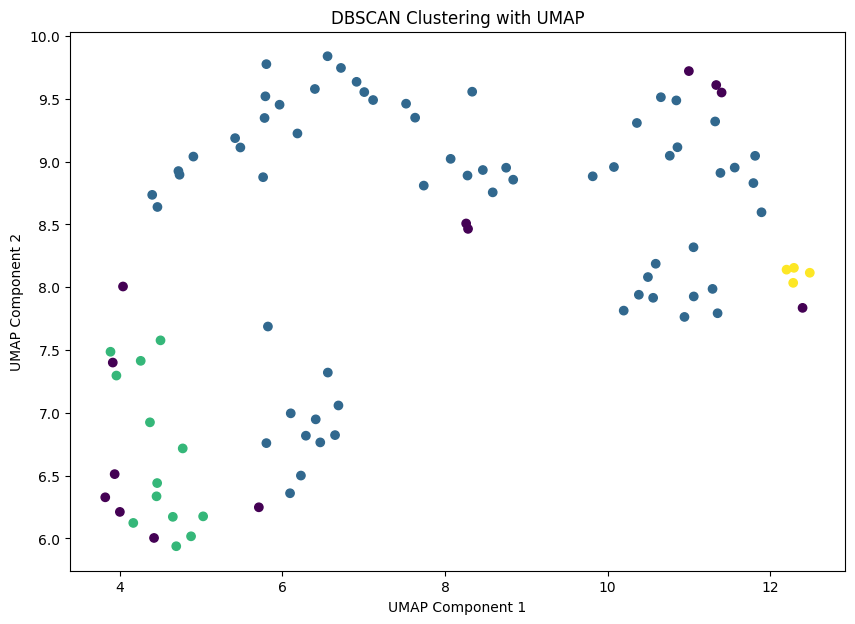

Estimated number of clusters: 3
Estimated number of noise points: 13
Silhouette Score: 0.13687483261162675

Mean values for each DBSCAN cluster (excluding noise):


/tmp/ipython-input-106-2607191582.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_human2['dbscan_cluster'] = dbscan_labels


Condition  AmountPatientRatio  TimePatientSeconds  \
dbscan_cluster                                                      
0                     0.0            0.870370          252.349206   
1                     0.0            0.871795          350.615385   
2                     0.0            0.791667          204.750000   

                TechnicalQuestion   Request  Statement  Differentiate  \
dbscan_cluster                                                          
0                        0.825397  0.904762   1.571429       0.238095   
1                        0.846154  0.923077   2.538462       0.307692   
2                        0.000000  0.500000   0.000000       0.000000   

                 Exclude  FirstQuestionSelf  AmountDiagnosesMentioned  \
dbscan_cluster                                                          
0               1.634921           0.920635                  5.015873   
1               2.307692           1.000000                  6.461538   
2               1.250000           1.000000                  2.250000   

                DurationInteractionSeconds  AmountInteraction  
dbscan_cluster                                                 
0                               809.095238          20.873016  
1                              1184.384615          29.076923  
2                               382.250000           5.250000

In [106]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_human2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply DBSCAN
dbscan = DBSCAN(eps=93, min_samples=3) # Default parameter values: 0.5 and 5, then I tuned eps and min_samples --> Results for eps: 84 = 4 clusters und 18 noise points / 94 resp 93 = 3 clusters und 13 noise points / 95 = 2 clusters und 13 noise points
dbscan_labels = dbscan.fit_predict(clustering_human2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=dbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate the silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_human2):
    silhouette_avg = silhouette_score(clustering_human2, dbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for DBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add DBSCAN labels to the dataframe
clustering_human2['dbscan_cluster'] = dbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_dbscan = clustering_human2[clustering_human2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()

print("\nMean values for each DBSCAN cluster (excluding noise):")
df_grouped_dbscan

### HDBSCAN

As a further clustering technique, the technique HDBSCAN is implemented, since this technique does not require the number of clusters as an input, similar to DBSCAN. HDBSCAN and DBSCAN define the number of clusters by themselves.

In [40]:
!pip install hdbscan
import hdbscan

# Drop a column in the dataset
clustering_df2.drop('dbscan_cluster', axis=1, inplace=True)

#### Visualization of the Results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


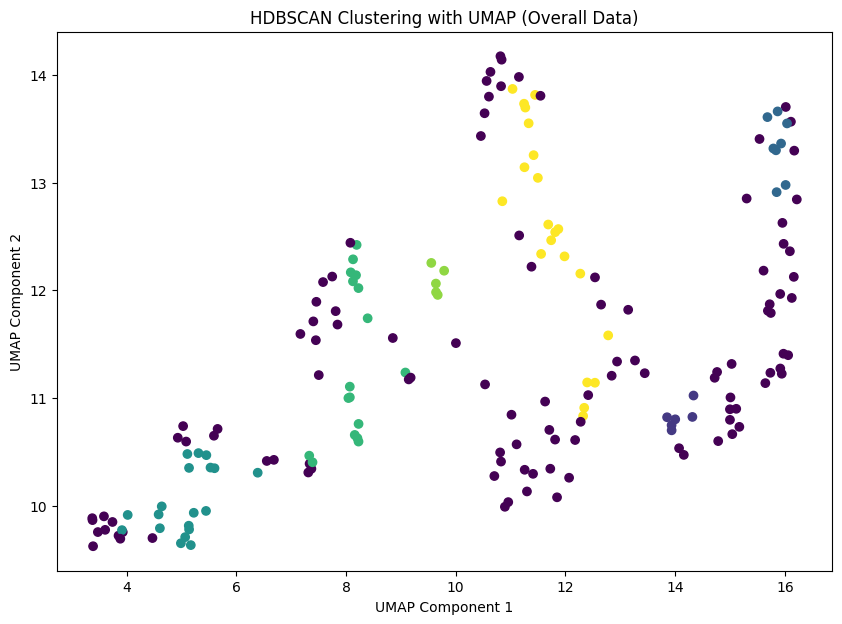

Estimated number of clusters: 6
Estimated number of noise points: 108
Silhouette Score: -0.1755255990973481

Mean values for each HDBSCAN cluster (excluding noise):


Condition  AmountPatientRatio  TimePatientSeconds  \
hdbscan_cluster                                                      
0                 0.500000            1.000000          472.000000   
1                 0.125000            0.833333          183.000000   
2                 0.789474            0.877193          194.631579   
3                 0.647059            0.823529          198.705882   
4                 0.600000            0.833333          210.600000   
5                 0.380952            0.888889          267.619048   

                 TechnicalQuestion   Request  Statement  Differentiate  \
hdbscan_cluster                                                          
0                         1.000000  1.666667   1.000000       0.166667   
1                         1.000000  1.375000   2.000000       0.375000   
2                         0.473684  0.842105   0.052632       0.052632   
3                         0.705882  1.176471   0.823529       0.058824   
4                         0.000000  1.200000   2.200000       0.200000   
5                         0.571429  0.857143   1.857143       0.285714   

                  Exclude  FirstQuestionSelf  AmountDiagnosesMentioned  \
hdbscan_cluster                                                          
0                2.333333           1.000000                 12.833333   
1                2.875000           0.875000                  9.750000   
2                1.052632           0.789474                  5.526316   
3                1.705882           0.823529                  9.235294   
4                1.600000           0.600000                 12.200000   
5                1.809524           0.857143                  8.190476   

                 DurationInteractionSeconds  AmountInteraction  
hdbscan_cluster                                                 
0                                979.500000          20.500000  
1                               1027.000000          25.750000  
2                                393.736842           7.105263  
3                                622.411765          15.882353  
4                                722.200000          24.000000  
5                                842.714286          20.190476

In [152]:
# Apply UMAP to the overall clustering_df2 for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # I tuned min_cluster_size
hdbscan_labels = clusterer.fit_predict(clustering_df2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=hdbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('HDBSCAN Clustering with UMAP (Overall Data)')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise_ = list(hdbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate the silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_df2):
    silhouette_avg = silhouette_score(clustering_df2, hdbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for HDBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add HDBSCAN labels to the dataframe
clustering_df2['hdbscan_cluster'] = hdbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_hdbscan = clustering_df2[clustering_df2['hdbscan_cluster'] != -1].groupby('hdbscan_cluster').mean()

print("\nMean values for each HDBSCAN cluster (excluding noise):")
display(df_grouped_hdbscan)

In [175]:
# Group the data by cluster and calculate the mean of each feature
df_grouped = clustering_df2.groupby('hdbscan_cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_df2[clustering_df2['hdbscan_cluster'] == 0]
cluster2_data = clustering_df2[clustering_df2['hdbscan_cluster'] == 1]
cluster3_data = clustering_df2[clustering_df2['hdbscan_cluster'] == 2]
cluster4_data = clustering_df2[clustering_df2['hdbscan_cluster'] == 3]
cluster5_data = clustering_df2[clustering_df2['hdbscan_cluster'] == 4]
cluster6_data = clustering_df2[clustering_df2['hdbscan_cluster'] == 5]

# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()
cluster5_mean = cluster5_data.mean()
cluster6_mean = cluster6_data.mean()

# Calculate the standard deviation of each feature for each cluster
cluster1_std = cluster1_data.std()
cluster2_std = cluster2_data.std()
cluster3_std = cluster3_data.std()
cluster4_std = cluster4_data.std()
cluster5_std = cluster5_data.std()
cluster6_std = cluster6_data.std()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 | Mean value for cluster 5 | Mean value for cluster 6 |
|---|---|---|---|---|---|---|
| Condition | {cluster1_mean['Condition']:.2f} ({cluster1_std['Condition']:.2f}) | **{cluster2_mean['Condition']:.2f}** ({cluster2_std['Condition']:.2f}) | **{cluster3_mean['Condition']:.2f}** ({cluster3_std['Condition']:.2f}) | {cluster4_mean['Condition']:.2f} ({cluster4_std['Condition']:.2f}) | {cluster5_mean['Condition']:.2f} ({cluster5_std['Condition']:.2f}) | {cluster6_mean['Condition']:.2f} ({cluster6_std['Condition']:.2f}) |
| Ratio of patient information | **{cluster1_mean['AmountPatientRatio']:.2f}** ({cluster1_std['AmountPatientRatio']:.2f}) | {cluster2_mean['AmountPatientRatio']:.2f} ({cluster2_std['AmountPatientRatio']:.2f}) | {cluster3_mean['AmountPatientRatio']:.2f} ({cluster3_std['AmountPatientRatio']:.2f}) | **{cluster4_mean['AmountPatientRatio']:.2f}** ({cluster4_std['AmountPatientRatio']:.2f}) | {cluster5_mean['AmountPatientRatio']:.2f} ({cluster5_std['AmountPatientRatio']:.2f}) | {cluster6_mean['AmountPatientRatio']:.2f} ({cluster6_std['AmountPatientRatio']:.2f}) |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} ({cluster1_std['TimePatientSeconds']:.2f}) | **{cluster2_mean['TimePatientSeconds']:.2f}** ({cluster2_std['TimePatientSeconds']:.2f}) | **{cluster3_mean['TimePatientSeconds']:.2f}** ({cluster3_std['TimePatientSeconds']:.2f}) | {cluster4_mean['TimePatientSeconds']:.2f} ({cluster4_std['TimePatientSeconds']:.2f}) | {cluster5_mean['TimePatientSeconds']:.2f} ({cluster5_std['TimePatientSeconds']:.2f}) | {cluster6_mean['TimePatientSeconds']:.2f} ({cluster6_std['TimePatientSeconds']:.2f}) |
| Q-type: Technical question | **{cluster1_mean['TechnicalQuestion']:.2f}** ({cluster1_std['TechnicalQuestion']:.2f}) | **{cluster2_mean['TechnicalQuestion']:.2f}** ({cluster2_std['TechnicalQuestion']:.2f}) | {cluster3_mean['TechnicalQuestion']:.2f} ({cluster3_std['TechnicalQuestion']:.2f}) | {cluster4_mean['TechnicalQuestion']:.2f} ({cluster4_std['TechnicalQuestion']:.2f}) | **{cluster5_mean['TechnicalQuestion']:.2f}** ({cluster5_std['TechnicalQuestion']:.2f}) | {cluster6_mean['TechnicalQuestion']:.2f} ({cluster6_std['TechnicalQuestion']:.2f}) |
| Q-type: Request | **{cluster1_mean['Request']:.2f}** ({cluster1_std['Request']:.2f}) | {cluster2_mean['Request']:.2f} ({cluster2_std['Request']:.2f}) | **{cluster3_mean['Request']:.2f}** ({cluster3_std['Request']:.2f}) | {cluster4_mean['Request']:.2f} ({cluster4_std['Request']:.2f}) | {cluster5_mean['Request']:.2f} ({cluster5_std['Request']:.2f}) | {cluster6_mean['Request']:.2f} ({cluster6_std['Request']:.2f}) |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} ({cluster1_std['Statement']:.2f}) | {cluster2_mean['Statement']:.2f} ({cluster2_std['Statement']:.2f}) | **{cluster3_mean['Statement']:.2f}** ({cluster3_std['Statement']:.2f}) | {cluster4_mean['Statement']:.2f} ({cluster4_std['Statement']:.2f}) | **{cluster5_mean['Statement']:.2f}** ({cluster5_std['Statement']:.2f}) | {cluster6_mean['Statement']:.2f} ({cluster6_std['Statement']:.2f}) |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} ({cluster1_std['Differentiate']:.2f}) | **{cluster2_mean['Differentiate']:.2f}** ({cluster2_std['Differentiate']:.2f}) | **{cluster3_mean['Differentiate']:.2f}** ({cluster3_std['Differentiate']:.2f}) | **{cluster4_mean['Differentiate']:.2f}** ({cluster4_std['Differentiate']:.2f}) | {cluster5_mean['Differentiate']:.2f}  ({cluster5_std['Differentiate']:.2f}) | {cluster6_mean['Differentiate']:.2f} ({cluster6_std['Differentiate']:.2f}) |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} ({cluster1_std['Exclude']:.2f}) | **{cluster2_mean['Exclude']:.2f}** ({cluster2_std['Exclude']:.2f}) | **{cluster3_mean['Exclude']:.2f}** ({cluster3_std['Exclude']:.2f}) | {cluster4_mean['Exclude']:.2f} ({cluster4_std['Exclude']:.2f}) | {cluster5_mean['Exclude']:.2f} ({cluster5_std['Exclude']:.2f}) | {cluster6_mean['Exclude']:.2f} ({cluster6_std['Exclude']:.2f}) |
| First question was self-formulated (and not copied) | **{cluster1_mean['FirstQuestionSelf']:.2f}** ({cluster1_std['FirstQuestionSelf']:.2f}) | {cluster2_mean['FirstQuestionSelf']:.2f} ({cluster2_std['FirstQuestionSelf']:.2f}) | {cluster3_mean['FirstQuestionSelf']:.2f} ({cluster3_std['FirstQuestionSelf']:.2f}) | {cluster4_mean['FirstQuestionSelf']:.2f} ({cluster4_std['FirstQuestionSelf']:.2f}) | **{cluster5_mean['FirstQuestionSelf']:.2f}** ({cluster5_std['FirstQuestionSelf']:.2f}) | {cluster6_mean['FirstQuestionSelf']:.2f} ({cluster6_std['FirstQuestionSelf']:.2f}) |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** ({cluster1_std['AmountDiagnosesMentioned']:.2f}) | {cluster2_mean['AmountDiagnosesMentioned']:.2f} ({cluster2_std['AmountDiagnosesMentioned']:.2f}) | **{cluster3_mean['AmountDiagnosesMentioned']:.2f}** ({cluster3_std['AmountDiagnosesMentioned']:.2f}) | {cluster4_mean['AmountDiagnosesMentioned']:.2f} ({cluster4_std['AmountDiagnosesMentioned']:.2f}) | {cluster5_mean['AmountDiagnosesMentioned']:.2f} ({cluster5_std['AmountDiagnosesMentioned']:.2f}) | {cluster6_mean['AmountDiagnosesMentioned']:.2f} ({cluster6_std['AmountDiagnosesMentioned']:.2f}) |
| Duration of the total chat interaction (in seconds) | {cluster1_mean['DurationInteractionSeconds']:.2f} ({cluster1_std['DurationInteractionSeconds']:.2f}) | **{cluster2_mean['DurationInteractionSeconds']:.2f}** ({cluster2_std['DurationInteractionSeconds']:.2f}) | **{cluster3_mean['DurationInteractionSeconds']:.2f}** ({cluster3_std['DurationInteractionSeconds']:.2f}) | {cluster4_mean['DurationInteractionSeconds']:.2f} ({cluster4_std['DurationInteractionSeconds']:.2f}) | {cluster5_mean['DurationInteractionSeconds']:.2f} ({cluster5_std['DurationInteractionSeconds']:.2f}) | {cluster6_mean['DurationInteractionSeconds']:.2f} ({cluster6_std['DurationInteractionSeconds']:.2f}) |
| Amount of interactions in the chat | {cluster1_mean['AmountInteraction']:.2f} ({cluster1_std['AmountInteraction']:.2f}) | **{cluster2_mean['AmountInteraction']:.2f}** ({cluster2_std['AmountInteraction']:.2f}) | **{cluster3_mean['AmountInteraction']:.2f}** ({cluster3_std['AmountInteraction']:.2f}) | {cluster4_mean['AmountInteraction']:.2f} ({cluster4_std['AmountInteraction']:.2f}) | {cluster5_mean['AmountInteraction']:.2f} ({cluster5_std['AmountInteraction']:.2f}) | {cluster6_mean['AmountInteraction']:.2f} ({cluster6_std['AmountInteraction']:.2f}) |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 | Mean value for cluster 5 | Mean value for cluster 6 |
|---|---|---|---|---|---|---|
| Condition | 0.50 (0.55) | **0.12** (0.35) | **0.79** (0.42) | 0.65 (0.49) | 0.60 (0.55) | 0.38 (0.50) |
| Ratio of patient information | **1.00** (0.00) | 0.83 (0.24) | 0.88 (0.22) | **0.82** (0.32) | 0.83 (0.29) | 0.89 (0.23) |
| Time of patient information (in seconds) | 472.00 (20.30) | **183.00** (25.66) | **194.63** (39.12) | 198.71 (63.64) | 210.60 (21.21) | 267.62 (78.63) |
| Q-type: Technical question | **1.00** (1.10) | **1.00** (1.31) | 0.47 (0.77) | 0.71 (1.10) | **0.00** (0.00) | 0.57 (0.68) |
| Q-type: Request | **1.67** (0.82) | 1.38 (1.30) | **0.84** (1.01) | 1.18 (1.59) | 1.20 (0.45) | 0.86 (0.96) |
| Q-type: Statement | 1.00 (1.26) | 2.00 (2.98) | **0.05** (0.23) | 0.82 (1.33) | **2.20** (1.10) | 1.86 (3.50) |
| Q-type: Differentiate | 0.17 (0.41) | **0.38** (0.74) | **0.05** (0.23) | **0.06** (0.24) | 0.20  (0.45) | 0.29 (0.56) |
| Q-type: Exclude | 2.33 (2.88) | **2.88** (1.25) | **1.05** (0.97) | 1.71 (1.76) | 1.60 (1.52) | 1.81 (2.52) |
| First question was self-formulated (and not copied) | **1.00** (0.00) | 0.88 (0.35) | 0.79 (0.42) | 0.82 (0.39) | **0.60** (0.55) | 0.86 (0.36) |
| Amount of mentioned diagnoses | **12.83** (10.07) | 9.75 (7.92) | **5.53** (4.11) | 9.24 (6.66) | 12.20 (6.30) | 8.19 (7.14) |
| Duration of the total chat interaction (in seconds) | 979.50 (31.39) | **1027.00** (38.59) | **393.74** (46.13) | 622.41 (44.51) | 722.20 (4.92) | 842.71 (25.28) |
| Amount of interactions in the chat | 20.50 (7.42) | **25.75** (10.91) | **7.11** (3.57) | 15.88 (9.41) | 24.00 (2.83) | 20.19 (8.51) |


In [145]:
# Instances of each cluster in a table
print(clustering_df2['hdbscan_cluster'].value_counts())

hdbscan_cluster
-1    108
 5     21
 2     19
 3     17
 1      8
 0      6
 4      5
Name: count, dtype: int64


#### Interpretation


* Cluster 1 - The Informationgatherer
    * Participants in this cluster acquired the most patient case information before starting the chat. During the chat interaction, they then asked a lot of technical questions and requested diagnoses from the assistant. They did this by formulating the first question without copying information from the patient case and by mentioning the most diagnoses in the chat. With this, people in this cluster tried in general to gather a lot of information.

* Cluster 2 - The High Performer and Discusser
    * This cluster is characterized by high values for the question types technical question, differentiation and exclusion. In addition, the values regarding the duration and the frequency of the chat interaction are above average. Therefore, a typical pattern of participants in this cluster is to talk a lot about comparing and excluding diagnoses. However, the value for the duration of patient information acquisition is below average. People do not tend to spend a lot of time gathering patient information and quickly start the interaction with the assistant in the chat.

* Cluster 3 - The Solo-Performer and Low Interester
    * People in this cluster generally show low values in the duration and frequency of chat interaction. They also tend to not talk a lot about diagnoses, nor request them or try to exclude various diagnoses with the help of the assistant. To summarize, participants in this cluster were not interested in using the assistant as a support in their decision-making process and preferred to solve the patient case by themselves.

* Cluster 4 - The Low Differentiator and Information-Seeker
    * This cluster presented the lowest values for the amount of patient information acquisition. People in this cluster not only seeked the least information, they also did not think about multiple diagnoses at the same time and tried to differentiate between them. They more often tended to follow their first idea of a diagnosis.

* Cluster 5 - The Omniscient
    * Participants in this cluster show chat interaction patterns that make them appear to be omniscient. In particular, they do not look at a lot of patient information before entering the chat and during the interaction do not ask a lot of technical questions but make a lot of statements themselves. In addition, they do not tend to put great effort into the discreteness of the first question of the chat interaction.

* Cluster 6 - The average user
    * This cluster is characterized by average values for the different features. Therefore, people in this cluster constitute of average chat users.

### HDBSCAN for the Condition ChatGPT

In [41]:
# Drop a certain column in the dataset
clustering_gpt2.drop('dbscan_cluster', axis=1, inplace=True)

KeyError: "['dbscan_cluster'] not found in axis"

#### Visualization of the Results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


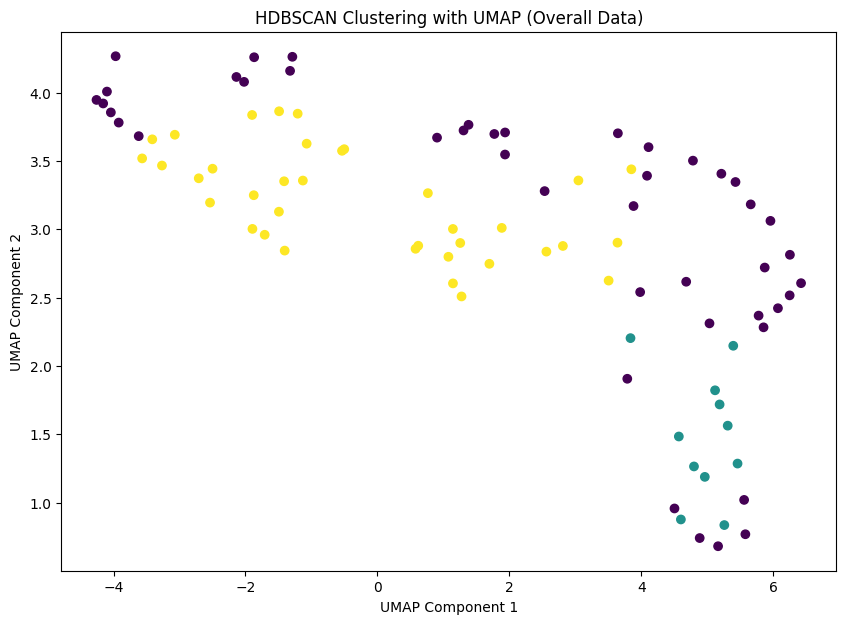

Estimated number of clusters: 2
Estimated number of noise points: 44
Silhouette Score: 0.028749949997485504

Mean values for each HDBSCAN cluster (excluding noise):


/tmp/ipython-input-121-470226382.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_gpt2['hdbscan_cluster'] = hdbscan_labels


Condition  AmountPatientRatio  TimePatientSeconds  \
hdbscan_cluster                                                      
0                      1.0            0.969697          401.636364   
1                      1.0            0.902778          200.944444   

                 TechnicalQuestion   Request  Statement  Differentiate  \
hdbscan_cluster                                                          
0                         0.454545  0.818182   1.727273       0.272727   
1                         0.638889  1.138889   0.500000       0.166667   

                  Exclude  FirstQuestionSelf  AmountDiagnosesMentioned  \
hdbscan_cluster                                                          
0                1.909091           0.636364                 13.000000   
1                1.500000           0.805556                  9.611111   

                 DurationInteractionSeconds  AmountInteraction  
hdbscan_cluster                                                 
0                                807.272727          16.454545  
1                                512.944444          12.666667

In [121]:
# Apply UMAP to the overall clustering_gpt2 for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # You can tune min_cluster_size / 3 = 6 Clusters and 50 noise points / 4 = 3 Clusters and 65 noise points / 5 = 2 clusters and 44 noise points / 6 = 2 clusters and 47 noise points
hdbscan_labels = clusterer.fit_predict(clustering_gpt2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=hdbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('HDBSCAN Clustering with UMAP (ChatGPT Condition)')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise_ = list(hdbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate the silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_gpt2):
    silhouette_avg = silhouette_score(clustering_gpt2, hdbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for HDBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add HDBSCAN labels to the dataframe
clustering_gpt2['hdbscan_cluster'] = hdbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_hdbscan = clustering_gpt2[clustering_gpt2['hdbscan_cluster'] != -1].groupby('hdbscan_cluster').mean()

print("\nMean values for each HDBSCAN cluster (excluding noise):")
display(df_grouped_hdbscan)

In [180]:
# Group the data by cluster and calculate the mean of each feature
df_grouped = clustering_gpt2.groupby('hdbscan_cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_gpt2[clustering_gpt2['hdbscan_cluster'] == 0]
cluster2_data = clustering_gpt2[clustering_gpt2['hdbscan_cluster'] == 1]


# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()


# Calculate the standard deviation of each feature for each cluster
cluster1_std = cluster1_data.std()
cluster2_std = cluster2_data.std()


# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 |
|---|---|---|
| Condition | {cluster1_mean['Condition']:.2f} ({cluster1_std['Condition']:.2f}) | {cluster2_mean['Condition']:.2f} ({cluster2_std['Condition']:.2f}) | **{cluster3_mean['Condition']:.2f}** ({cluster3_std['Condition']:.2f}) | {cluster4_mean['Condition']:.2f} ({cluster4_std['Condition']:.2f}) | {cluster5_mean['Condition']:.2f} ({cluster5_std['Condition']:.2f}) | {cluster6_mean['Condition']:.2f} ({cluster6_std['Condition']:.2f}) |
| Ratio of patient information | **{cluster1_mean['AmountPatientRatio']:.2f}** ({cluster1_std['AmountPatientRatio']:.2f}) | {cluster2_mean['AmountPatientRatio']:.2f} ({cluster2_std['AmountPatientRatio']:.2f}) | {cluster3_mean['AmountPatientRatio']:.2f} ({cluster3_std['AmountPatientRatio']:.2f}) | **{cluster4_mean['AmountPatientRatio']:.2f}** ({cluster4_std['AmountPatientRatio']:.2f}) | {cluster5_mean['AmountPatientRatio']:.2f} ({cluster5_std['AmountPatientRatio']:.2f}) | {cluster6_mean['AmountPatientRatio']:.2f} ({cluster6_std['AmountPatientRatio']:.2f}) |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} ({cluster1_std['TimePatientSeconds']:.2f}) | **{cluster2_mean['TimePatientSeconds']:.2f}** ({cluster2_std['TimePatientSeconds']:.2f}) | **{cluster3_mean['TimePatientSeconds']:.2f}** ({cluster3_std['TimePatientSeconds']:.2f}) | {cluster4_mean['TimePatientSeconds']:.2f} ({cluster4_std['TimePatientSeconds']:.2f}) | {cluster5_mean['TimePatientSeconds']:.2f} ({cluster5_std['TimePatientSeconds']:.2f}) | {cluster6_mean['TimePatientSeconds']:.2f} ({cluster6_std['TimePatientSeconds']:.2f}) |
| Q-type: Technical question | **{cluster1_mean['TechnicalQuestion']:.2f}** ({cluster1_std['TechnicalQuestion']:.2f}) | **{cluster2_mean['TechnicalQuestion']:.2f}** ({cluster2_std['TechnicalQuestion']:.2f}) | {cluster3_mean['TechnicalQuestion']:.2f} ({cluster3_std['TechnicalQuestion']:.2f}) | {cluster4_mean['TechnicalQuestion']:.2f} ({cluster4_std['TechnicalQuestion']:.2f}) | **{cluster5_mean['TechnicalQuestion']:.2f}** ({cluster5_std['TechnicalQuestion']:.2f}) | {cluster6_mean['TechnicalQuestion']:.2f} ({cluster6_std['TechnicalQuestion']:.2f}) |
| Q-type: Request | **{cluster1_mean['Request']:.2f}** ({cluster1_std['Request']:.2f}) | {cluster2_mean['Request']:.2f} ({cluster2_std['Request']:.2f}) | **{cluster3_mean['Request']:.2f}** ({cluster3_std['Request']:.2f}) | {cluster4_mean['Request']:.2f} ({cluster4_std['Request']:.2f}) | {cluster5_mean['Request']:.2f} ({cluster5_std['Request']:.2f}) | {cluster6_mean['Request']:.2f} ({cluster6_std['Request']:.2f}) |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} ({cluster1_std['Statement']:.2f}) | {cluster2_mean['Statement']:.2f} ({cluster2_std['Statement']:.2f}) | **{cluster3_mean['Statement']:.2f}** ({cluster3_std['Statement']:.2f}) | {cluster4_mean['Statement']:.2f} ({cluster4_std['Statement']:.2f}) | **{cluster5_mean['Statement']:.2f}** ({cluster5_std['Statement']:.2f}) | {cluster6_mean['Statement']:.2f} ({cluster6_std['Statement']:.2f}) |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} ({cluster1_std['Differentiate']:.2f}) | **{cluster2_mean['Differentiate']:.2f}** ({cluster2_std['Differentiate']:.2f}) | **{cluster3_mean['Differentiate']:.2f}** ({cluster3_std['Differentiate']:.2f}) | **{cluster4_mean['Differentiate']:.2f}** ({cluster4_std['Differentiate']:.2f}) | {cluster5_mean['Differentiate']:.2f}  ({cluster5_std['Differentiate']:.2f}) | {cluster6_mean['Differentiate']:.2f} ({cluster6_std['Differentiate']:.2f}) |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} ({cluster1_std['Exclude']:.2f}) | **{cluster2_mean['Exclude']:.2f}** ({cluster2_std['Exclude']:.2f}) | **{cluster3_mean['Exclude']:.2f}** ({cluster3_std['Exclude']:.2f}) | {cluster4_mean['Exclude']:.2f} ({cluster4_std['Exclude']:.2f}) | {cluster5_mean['Exclude']:.2f} ({cluster5_std['Exclude']:.2f}) | {cluster6_mean['Exclude']:.2f} ({cluster6_std['Exclude']:.2f}) |
| First question was self-formulated (and not copied) | **{cluster1_mean['FirstQuestionSelf']:.2f}** ({cluster1_std['FirstQuestionSelf']:.2f}) | {cluster2_mean['FirstQuestionSelf']:.2f} ({cluster2_std['FirstQuestionSelf']:.2f}) | {cluster3_mean['FirstQuestionSelf']:.2f} ({cluster3_std['FirstQuestionSelf']:.2f}) | {cluster4_mean['FirstQuestionSelf']:.2f} ({cluster4_std['FirstQuestionSelf']:.2f}) | **{cluster5_mean['FirstQuestionSelf']:.2f}** ({cluster5_std['FirstQuestionSelf']:.2f}) | {cluster6_mean['FirstQuestionSelf']:.2f} ({cluster6_std['FirstQuestionSelf']:.2f}) |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** ({cluster1_std['AmountDiagnosesMentioned']:.2f}) | {cluster2_mean['AmountDiagnosesMentioned']:.2f} ({cluster2_std['AmountDiagnosesMentioned']:.2f}) | **{cluster3_mean['AmountDiagnosesMentioned']:.2f}** ({cluster3_std['AmountDiagnosesMentioned']:.2f}) | {cluster4_mean['AmountDiagnosesMentioned']:.2f} ({cluster4_std['AmountDiagnosesMentioned']:.2f}) | {cluster5_mean['AmountDiagnosesMentioned']:.2f} ({cluster5_std['AmountDiagnosesMentioned']:.2f}) | {cluster6_mean['AmountDiagnosesMentioned']:.2f} ({cluster6_std['AmountDiagnosesMentioned']:.2f}) |
| Duration of the total chat interaction (in seconds) | {cluster1_mean['DurationInteractionSeconds']:.2f} ({cluster1_std['DurationInteractionSeconds']:.2f}) | **{cluster2_mean['DurationInteractionSeconds']:.2f}** ({cluster2_std['DurationInteractionSeconds']:.2f}) | **{cluster3_mean['DurationInteractionSeconds']:.2f}** ({cluster3_std['DurationInteractionSeconds']:.2f}) | {cluster4_mean['DurationInteractionSeconds']:.2f} ({cluster4_std['DurationInteractionSeconds']:.2f}) | {cluster5_mean['DurationInteractionSeconds']:.2f} ({cluster5_std['DurationInteractionSeconds']:.2f}) | {cluster6_mean['DurationInteractionSeconds']:.2f} ({cluster6_std['DurationInteractionSeconds']:.2f}) |
| Amount of interactions in the chat | {cluster1_mean['AmountInteraction']:.2f} ({cluster1_std['AmountInteraction']:.2f}) | **{cluster2_mean['AmountInteraction']:.2f}** ({cluster2_std['AmountInteraction']:.2f}) | **{cluster3_mean['AmountInteraction']:.2f}** ({cluster3_std['AmountInteraction']:.2f}) | {cluster4_mean['AmountInteraction']:.2f} ({cluster4_std['AmountInteraction']:.2f}) | {cluster5_mean['AmountInteraction']:.2f} ({cluster5_std['AmountInteraction']:.2f}) | {cluster6_mean['AmountInteraction']:.2f} ({cluster6_std['AmountInteraction']:.2f}) |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | 
|---|---|---|
| Condition | 1.00 (0.00) | 1.00 (0.00) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Ratio of patient information | **0.97** (0.07) | 0.90 (0.21) | nan (nan) | **nan** (nan) | nan (nan) | nan (nan) |
| Time of patient information (in seconds) | 401.64 (49.02) | **200.94** (49.68) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Q-type: Technical question | **0.45** (1.21) | **0.64** (0.87) | nan (nan) | nan (nan) | **nan** (nan) | nan (nan) |
| Q-type: Request | **0.82** (0.75) | 1.14 (1.15) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Q-type: Statement | 1.73 (2.33) | 0.50 (1.00) | **nan** (nan) | nan (nan) | **nan** (nan) | nan (nan) |
| Q-type: Differentiate | 0.27 (0.65) | **0.17** (0.38) | **nan** (nan) | **nan** (nan) | nan  (nan) | nan (nan) |
| Q-type: Exclude | 1.91 (1.14) | **1.50** (1.80) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| First question was self-formulated (and not copied) | **0.64** (0.50) | 0.81 (0.40) | nan (nan) | nan (nan) | **nan** (nan) | nan (nan) |
| Amount of mentioned diagnoses | **13.00** (5.95) | 9.61 (6.37) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Duration of the total chat interaction (in seconds) | 807.27 (49.21) | **512.94** (157.18) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Amount of interactions in the chat | 16.45 (7.99) | **12.67** (8.49) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |


In [146]:
# Instances of each clustering value are in a table
print(clustering_gpt2['hdbscan_cluster'].value_counts())

hdbscan_cluster
-1    44
 1    36
 0    11
Name: count, dtype: int64


#### Interpretation


* Cluster 1 - The Exemplary User
    * The first cluster of the data of the ChatGPT conditions shows interaction patterns of a model user. Participants in this cluster first take their time to thoroughly analyze the patient information. Afterward, they use the chat interaction not to request final diagnoses but to talk intensively with ChatGPT about the differential diagnoses they had in mind. They compare different ideas of differential diagnoses and verify them with the support of ChatGPT. With this behavior, the best possible support of ChatGPT can potentially be achieved.

* Cluster 2 - The Information Aid
    * People in this cluster did not use ChatGPT as a discussion partner for possible differential diagnoses, but as an information aid. Participants in this cluster predominantly asked technical questions and requested differential diagnoses from ChatGPT. They also showed a high discreteness of the initial question, which is connected to the low patient information acquisition.

### HDBSCAN for the Condition Human Expert

In [113]:
# Drop a certain column in the dataset
clustering_human2.drop('dbscan_cluster', axis=1, inplace=True)

/tmp/ipython-input-113-3423556079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_human2.drop('dbscan_cluster', axis=1, inplace=True)


#### Visualization of the Results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


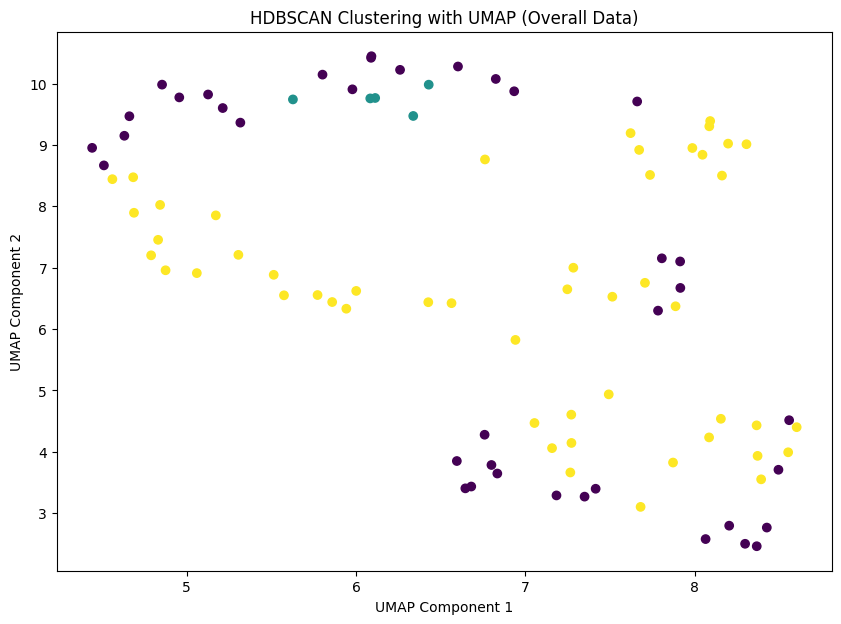

Estimated number of clusters: 2
Estimated number of noise points: 38
Silhouette Score: 0.01336948044694643

Mean values for each HDBSCAN cluster (excluding noise):


/tmp/ipython-input-126-2555052283.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_human2['hdbscan_cluster'] = hdbscan_labels


Condition  AmountPatientRatio  TimePatientSeconds  \
hdbscan_cluster                                                      
0                      0.0            0.866667               336.6   
1                      0.0            0.880000               239.2   

                 TechnicalQuestion  Request  Statement  Differentiate  \
hdbscan_cluster                                                         
0                             1.60      1.0        1.0           0.40   
1                             0.78      1.0        1.8           0.28   

                 Exclude  FirstQuestionSelf  AmountDiagnosesMentioned  \
hdbscan_cluster                                                         
0                   1.40               1.00                      4.60   
1                   1.78               0.92                      5.34   

                 DurationInteractionSeconds  AmountInteraction  
hdbscan_cluster                                                 
0                                   1162.80              29.80  
1                                    833.56              21.62

In [126]:
# Apply UMAP to the overall clustering_human2 for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_human2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # You can tune min_cluster_size / 3 = 6 clusters and 31 noise points / 4 = 4 Clusters and 46 noise points / 5 = 2 clusters and 38 noise points / 6 = 3 clusters and 66 noise points
hdbscan_labels = clusterer.fit_predict(clustering_human2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=hdbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('HDBSCAN Clustering with UMAP (Human Condition)')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise_ = list(hdbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate the silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_human2):
    silhouette_avg = silhouette_score(clustering_human2, hdbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for HDBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add HDBSCAN labels to the dataframe
clustering_human2['hdbscan_cluster'] = hdbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_hdbscan = clustering_human2[clustering_human2['hdbscan_cluster'] != -1].groupby('hdbscan_cluster').mean()

print("\nMean values for each HDBSCAN cluster (excluding noise):")
display(df_grouped_hdbscan)

In [179]:
# Group the data by cluster and calculate the mean of each feature
df_grouped = clustering_human2.groupby('hdbscan_cluster').mean()

# Filter the DataFrame for each cluster
cluster1_data = clustering_human2[clustering_human2['hdbscan_cluster'] == 0]
cluster2_data = clustering_human2[clustering_human2['hdbscan_cluster'] == 1]


# Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()


# Calculate the standard deviation of each feature for each cluster
cluster1_std = cluster1_data.std()
cluster2_std = cluster2_data.std()


# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 |
|---|---|---|
| Condition | {cluster1_mean['Condition']:.2f} ({cluster1_std['Condition']:.2f}) | {cluster2_mean['Condition']:.2f} ({cluster2_std['Condition']:.2f}) | **{cluster3_mean['Condition']:.2f}** ({cluster3_std['Condition']:.2f}) | {cluster4_mean['Condition']:.2f} ({cluster4_std['Condition']:.2f}) | {cluster5_mean['Condition']:.2f} ({cluster5_std['Condition']:.2f}) | {cluster6_mean['Condition']:.2f} ({cluster6_std['Condition']:.2f}) |
| Ratio of patient information | **{cluster1_mean['AmountPatientRatio']:.2f}** ({cluster1_std['AmountPatientRatio']:.2f}) | {cluster2_mean['AmountPatientRatio']:.2f} ({cluster2_std['AmountPatientRatio']:.2f}) | {cluster3_mean['AmountPatientRatio']:.2f} ({cluster3_std['AmountPatientRatio']:.2f}) | **{cluster4_mean['AmountPatientRatio']:.2f}** ({cluster4_std['AmountPatientRatio']:.2f}) | {cluster5_mean['AmountPatientRatio']:.2f} ({cluster5_std['AmountPatientRatio']:.2f}) | {cluster6_mean['AmountPatientRatio']:.2f} ({cluster6_std['AmountPatientRatio']:.2f}) |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} ({cluster1_std['TimePatientSeconds']:.2f}) | **{cluster2_mean['TimePatientSeconds']:.2f}** ({cluster2_std['TimePatientSeconds']:.2f}) | **{cluster3_mean['TimePatientSeconds']:.2f}** ({cluster3_std['TimePatientSeconds']:.2f}) | {cluster4_mean['TimePatientSeconds']:.2f} ({cluster4_std['TimePatientSeconds']:.2f}) | {cluster5_mean['TimePatientSeconds']:.2f} ({cluster5_std['TimePatientSeconds']:.2f}) | {cluster6_mean['TimePatientSeconds']:.2f} ({cluster6_std['TimePatientSeconds']:.2f}) |
| Q-type: Technical question | **{cluster1_mean['TechnicalQuestion']:.2f}** ({cluster1_std['TechnicalQuestion']:.2f}) | **{cluster2_mean['TechnicalQuestion']:.2f}** ({cluster2_std['TechnicalQuestion']:.2f}) | {cluster3_mean['TechnicalQuestion']:.2f} ({cluster3_std['TechnicalQuestion']:.2f}) | {cluster4_mean['TechnicalQuestion']:.2f} ({cluster4_std['TechnicalQuestion']:.2f}) | **{cluster5_mean['TechnicalQuestion']:.2f}** ({cluster5_std['TechnicalQuestion']:.2f}) | {cluster6_mean['TechnicalQuestion']:.2f} ({cluster6_std['TechnicalQuestion']:.2f}) |
| Q-type: Request | **{cluster1_mean['Request']:.2f}** ({cluster1_std['Request']:.2f}) | {cluster2_mean['Request']:.2f} ({cluster2_std['Request']:.2f}) | **{cluster3_mean['Request']:.2f}** ({cluster3_std['Request']:.2f}) | {cluster4_mean['Request']:.2f} ({cluster4_std['Request']:.2f}) | {cluster5_mean['Request']:.2f} ({cluster5_std['Request']:.2f}) | {cluster6_mean['Request']:.2f} ({cluster6_std['Request']:.2f}) |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} ({cluster1_std['Statement']:.2f}) | {cluster2_mean['Statement']:.2f} ({cluster2_std['Statement']:.2f}) | **{cluster3_mean['Statement']:.2f}** ({cluster3_std['Statement']:.2f}) | {cluster4_mean['Statement']:.2f} ({cluster4_std['Statement']:.2f}) | **{cluster5_mean['Statement']:.2f}** ({cluster5_std['Statement']:.2f}) | {cluster6_mean['Statement']:.2f} ({cluster6_std['Statement']:.2f}) |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} ({cluster1_std['Differentiate']:.2f}) | **{cluster2_mean['Differentiate']:.2f}** ({cluster2_std['Differentiate']:.2f}) | **{cluster3_mean['Differentiate']:.2f}** ({cluster3_std['Differentiate']:.2f}) | **{cluster4_mean['Differentiate']:.2f}** ({cluster4_std['Differentiate']:.2f}) | {cluster5_mean['Differentiate']:.2f}  ({cluster5_std['Differentiate']:.2f}) | {cluster6_mean['Differentiate']:.2f} ({cluster6_std['Differentiate']:.2f}) |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} ({cluster1_std['Exclude']:.2f}) | **{cluster2_mean['Exclude']:.2f}** ({cluster2_std['Exclude']:.2f}) | **{cluster3_mean['Exclude']:.2f}** ({cluster3_std['Exclude']:.2f}) | {cluster4_mean['Exclude']:.2f} ({cluster4_std['Exclude']:.2f}) | {cluster5_mean['Exclude']:.2f} ({cluster5_std['Exclude']:.2f}) | {cluster6_mean['Exclude']:.2f} ({cluster6_std['Exclude']:.2f}) |
| First question was self-formulated (and not copied) | **{cluster1_mean['FirstQuestionSelf']:.2f}** ({cluster1_std['FirstQuestionSelf']:.2f}) | {cluster2_mean['FirstQuestionSelf']:.2f} ({cluster2_std['FirstQuestionSelf']:.2f}) | {cluster3_mean['FirstQuestionSelf']:.2f} ({cluster3_std['FirstQuestionSelf']:.2f}) | {cluster4_mean['FirstQuestionSelf']:.2f} ({cluster4_std['FirstQuestionSelf']:.2f}) | **{cluster5_mean['FirstQuestionSelf']:.2f}** ({cluster5_std['FirstQuestionSelf']:.2f}) | {cluster6_mean['FirstQuestionSelf']:.2f} ({cluster6_std['FirstQuestionSelf']:.2f}) |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** ({cluster1_std['AmountDiagnosesMentioned']:.2f}) | {cluster2_mean['AmountDiagnosesMentioned']:.2f} ({cluster2_std['AmountDiagnosesMentioned']:.2f}) | **{cluster3_mean['AmountDiagnosesMentioned']:.2f}** ({cluster3_std['AmountDiagnosesMentioned']:.2f}) | {cluster4_mean['AmountDiagnosesMentioned']:.2f} ({cluster4_std['AmountDiagnosesMentioned']:.2f}) | {cluster5_mean['AmountDiagnosesMentioned']:.2f} ({cluster5_std['AmountDiagnosesMentioned']:.2f}) | {cluster6_mean['AmountDiagnosesMentioned']:.2f} ({cluster6_std['AmountDiagnosesMentioned']:.2f}) |
| Duration of the total chat interaction (in seconds) | {cluster1_mean['DurationInteractionSeconds']:.2f} ({cluster1_std['DurationInteractionSeconds']:.2f}) | **{cluster2_mean['DurationInteractionSeconds']:.2f}** ({cluster2_std['DurationInteractionSeconds']:.2f}) | **{cluster3_mean['DurationInteractionSeconds']:.2f}** ({cluster3_std['DurationInteractionSeconds']:.2f}) | {cluster4_mean['DurationInteractionSeconds']:.2f} ({cluster4_std['DurationInteractionSeconds']:.2f}) | {cluster5_mean['DurationInteractionSeconds']:.2f} ({cluster5_std['DurationInteractionSeconds']:.2f}) | {cluster6_mean['DurationInteractionSeconds']:.2f} ({cluster6_std['DurationInteractionSeconds']:.2f}) |
| Amount of interactions in the chat | {cluster1_mean['AmountInteraction']:.2f} ({cluster1_std['AmountInteraction']:.2f}) | **{cluster2_mean['AmountInteraction']:.2f}** ({cluster2_std['AmountInteraction']:.2f}) | **{cluster3_mean['AmountInteraction']:.2f}** ({cluster3_std['AmountInteraction']:.2f}) | {cluster4_mean['AmountInteraction']:.2f} ({cluster4_std['AmountInteraction']:.2f}) | {cluster5_mean['AmountInteraction']:.2f} ({cluster5_std['AmountInteraction']:.2f}) | {cluster6_mean['AmountInteraction']:.2f} ({cluster6_std['AmountInteraction']:.2f}) |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | 
|---|---|---|
| Condition | 0.00 (0.00) | 0.00 (0.00) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Ratio of patient information | **0.87** (0.30) | 0.88 (0.24) | nan (nan) | **nan** (nan) | nan (nan) | nan (nan) |
| Time of patient information (in seconds) | 336.60 (44.33) | **239.20** (93.03) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Q-type: Technical question | **1.60** (1.14) | **0.78** (1.00) | nan (nan) | nan (nan) | **nan** (nan) | nan (nan) |
| Q-type: Request | **1.00** (1.00) | 1.00 (0.99) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Q-type: Statement | 1.00 (0.71) | 1.80 (2.86) | **nan** (nan) | nan (nan) | **nan** (nan) | nan (nan) |
| Q-type: Differentiate | 0.40 (0.89) | **0.28** (0.54) | **nan** (nan) | **nan** (nan) | nan  (nan) | nan (nan) |
| Q-type: Exclude | 1.40 (0.55) | **1.78** (1.68) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| First question was self-formulated (and not copied) | **1.00** (0.00) | 0.92 (0.27) | nan (nan) | nan (nan) | **nan** (nan) | nan (nan) |
| Amount of mentioned diagnoses | **4.60** (2.70) | 5.34 (3.26) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Duration of the total chat interaction (in seconds) | 1162.80 (37.98) | **833.56** (152.78) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |
| Amount of interactions in the chat | 29.80 (9.31) | **21.62** (10.35) | **nan** (nan) | nan (nan) | nan (nan) | nan (nan) |


In [147]:
# Instances of each cluster in a table
print(clustering_human2['hdbscan_cluster'].value_counts())

hdbscan_cluster
 1    50
-1    38
 0     5
Name: count, dtype: int64


#### Interpretation


* Cluster 1 - The Slow but Self-Driving Novice
    * People in this cluster took their time in the beginning to acquire the patient information (on average 5.5 minutes). Then they used the chat interaction with the human coach to mostly ask technical questions and to differentiate multiple diagnoses they developed by themselves. The values for the frequency and time of the chat interaction are above average, indicating an intensive discussion between the participant and the human coach.

* Cluster 2 - The Fast Statement Generator and Diagnosis Verificator
    * Participants in the second cluster comprehensively look at the patient information. Then during the chat interaction, their behavior patterns differ visibly from the people in cluster 1. Participants in cluster 2 mentioned in general a lot of differential diagnoses throughout the chat. They used the human chat partner to verify whether the mentioned diagnoses should be kept or excluded from the list of possible differential diagnoses. In this way they reduced the set of possible differential diagnoses until they arrived at one final diagnosis for the patient.